## Table of Content

### 1. Introduction
- 1.1 Data Description
- 1.2 Objective of this project

### 2. Fetching Data
- 2.1 Import necessary Libraries
- 2.2 Import data

### 3. EDA

### 4. Encoding Dataframe
### 5. Describe the dataset
### 6. Correlation of the features with target column
### 7. Visualizing correlation of feature columns with label column.
### 8. Checking Distribution of data
### 9. Checking Outliers
- 9.1 Removing Outliers
- 9.2 Percentage of data loss

### 10. Checking Multicollinearity
### 11. Building Model
- 11.1 Balancing Datasaet
- 11.2 LogisticRegression
- 11.3 Random Forest Classifier
- 11.4 Gradient Boosting Classifier
- 11.5 XGBOOST
- 11.6 SVC
- 11.7 KNN


### 12. Selecting Best Model
### 13. Hyperparameter Tuning
### 14. ROC_AUC Curve
### 15. Documenting the finding
### 16. Model Save

## 1. Introduction
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### 1.1 Data Description

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


### 1.2 Objective of this project
- The goal of this machine learning project is to predict the Income.
- This is the classification problem

## 2. Fetching Data

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### 2.2 Importing dataset

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
data.shape

(32560, 15)

### Droping Duplicates

In [6]:
data.drop_duplicates()
data.shape

(32560, 15)

- No duplicates values are present.

### Checking unique values

In [7]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
object_describe=data.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


# 3. EDA

### Checking Null Values

In [9]:
object_columns=data.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data[object_columns[i]].value_counts()) 

----- Workclass-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----- Education-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----- Marital_status-----
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
--

- Here are some missing values denoted with '?'

In [10]:
data=data.replace(" ?",np.nan) 

In [11]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

### Filling Missing values

In [12]:
null_columns =['Workclass','Occupation','Native_country']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True)

In [13]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [14]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

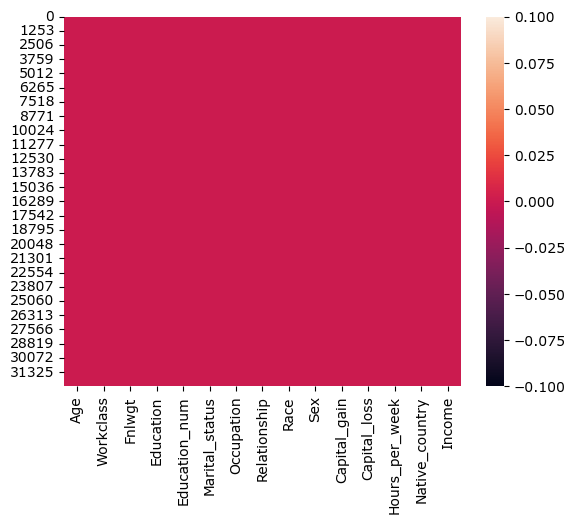

In [15]:
sns.heatmap(data.isnull())

- We can see there is no null values present in dataset.

### Checking all information

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- No null value present.
- Datatype is ok with respect to their column.
- Output columns is object datatypes it mean its classification problem.

# Visualization of the data

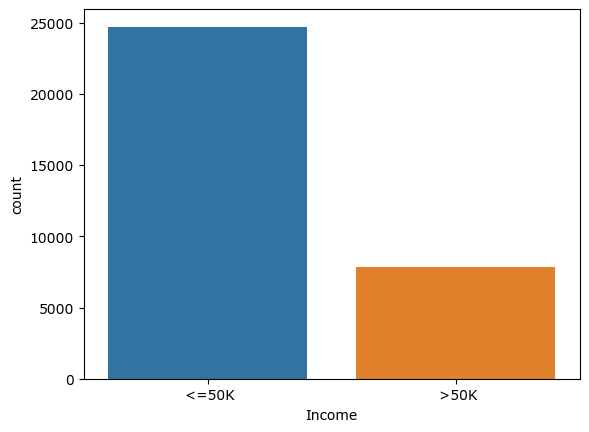

In [17]:
sns.countplot(x='Income',data=data)
plt.show()

- We can see, maximum people have less than 50k.
- Upto 7000 both are having same income.

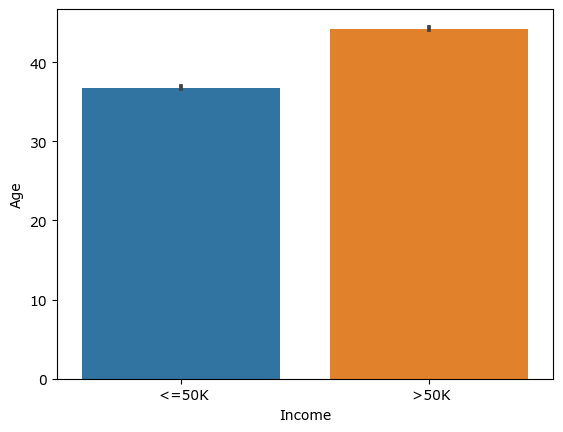

In [18]:
# Comaprision between Attrition and Age
sns.barplot(x='Income',y='Age',data=data)
plt.show()

- As per age, distribution of income upto age of 35 is same.
- greter than 50k has maximum Income.

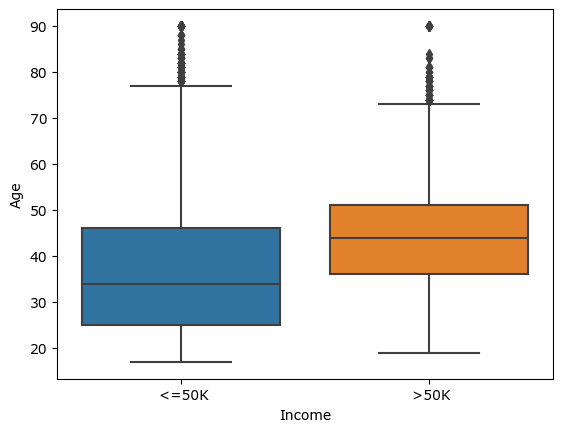

In [19]:
sns.boxplot(x="Income", y="Age", data=data)
plt.show()

- The mean "age" for Income group(<=50k) is 36.8 years.
 - And for Income group(>50k) is 44.2 years

<Axes: xlabel='Age', ylabel='count'>

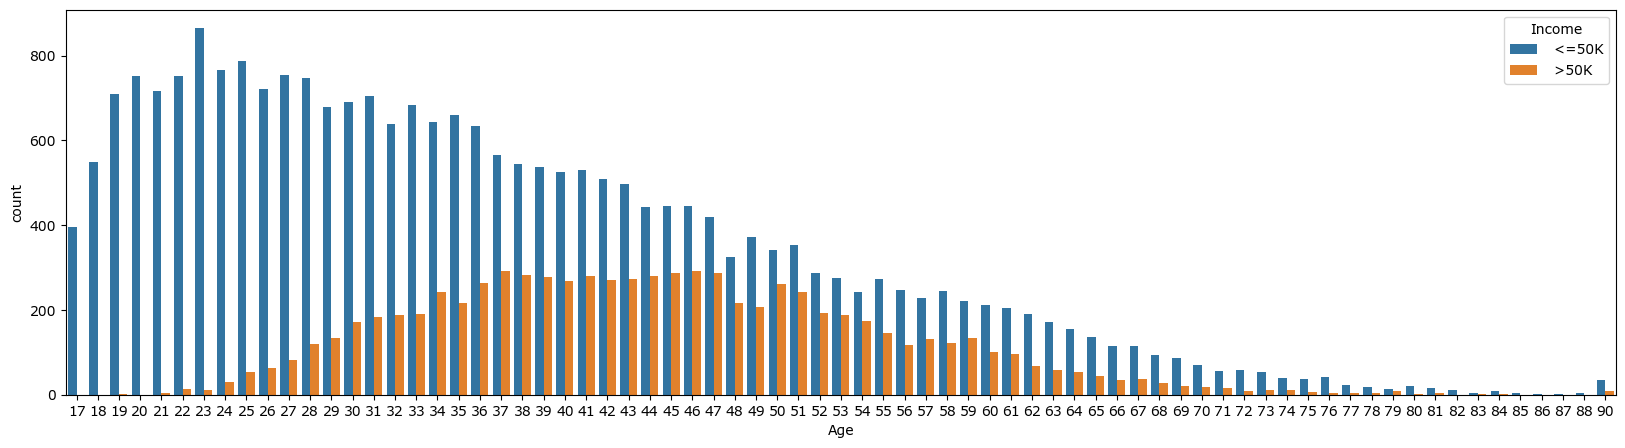

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',hue='Income',data=data)

- We can see, maximum people are having less 50K income.
- 17 to 40 at this age group people have less 50K salary is maximum with respect to grether than 50k.
- 33 to 45 at this age group have maximum income i.e >50k

<Axes: xlabel='count', ylabel='Workclass'>

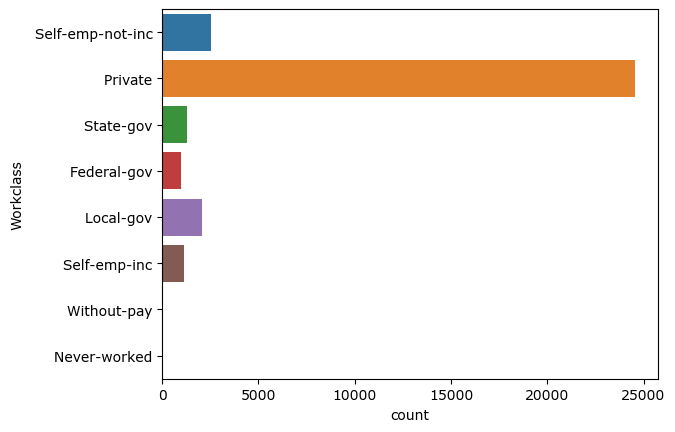

In [21]:
sns.countplot(y='Workclass',data=data)

- We can see, maximum people are in private sector follwed by self-employeed.
- Local govt. also in 3rd postion where people are doing job.

<Axes: xlabel='count', ylabel='Workclass'>

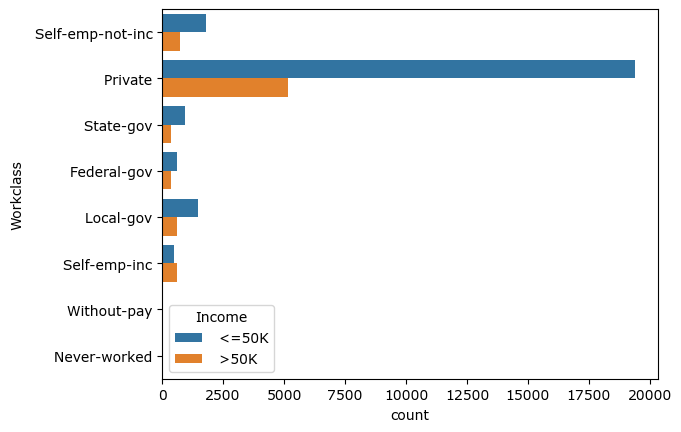

In [22]:
sns.countplot(y='Workclass',hue='Income',data=data)

- In private workclass most of the people(59.48%) earn <=50k.
- self-emp-inc workclass is only where more people earn >50k.
- In Federal-gov workclass nearly more than half of the people earn >50k.

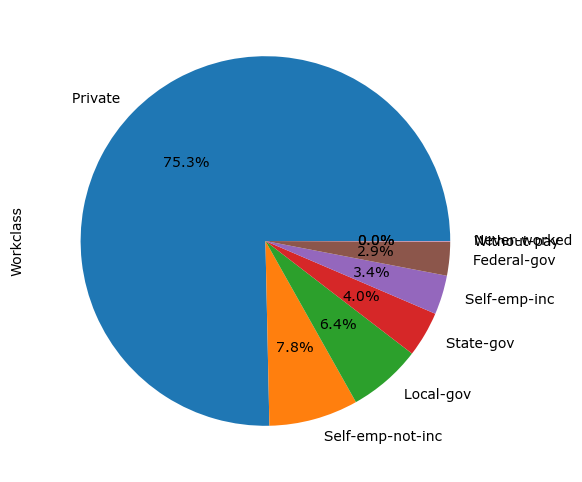

In [23]:
a = data['Workclass'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, 69.7% people doing work at private sector.
- 7.8% people are self employeed.

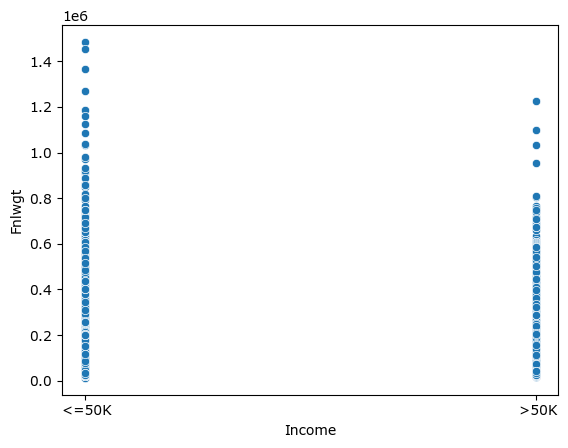

In [24]:
sns.scatterplot(x='Income',y='Fnlwgt',data=data)
plt.show()

- We can see, <50K has maximum final weight.
- Upto 1.2 all income having same final weight.

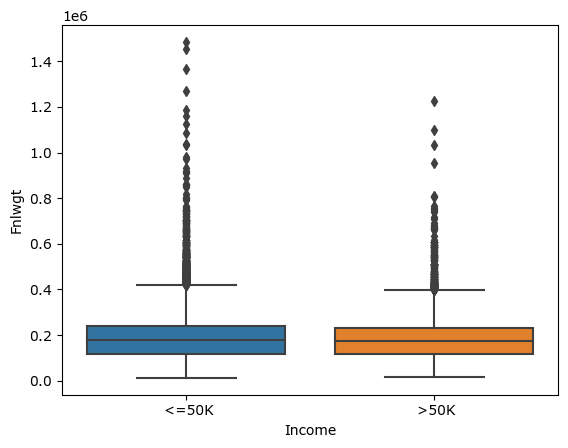

In [25]:
sns.boxplot(x="Income", y="Fnlwgt", data=data)
plt.show()

- We can see that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

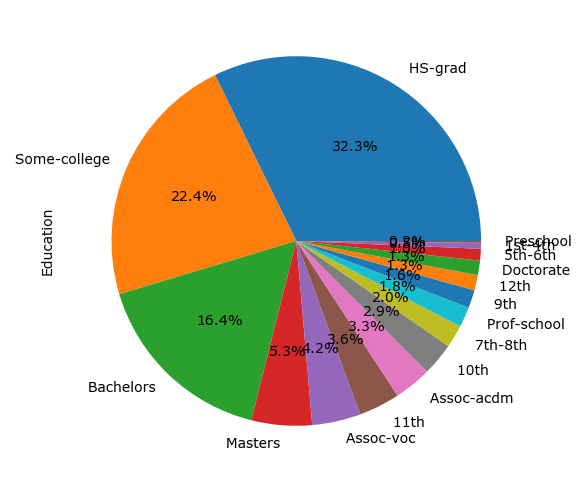

In [26]:
a = data['Education'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, HS grade is having maximum education.
- Pre-School has minimum education.

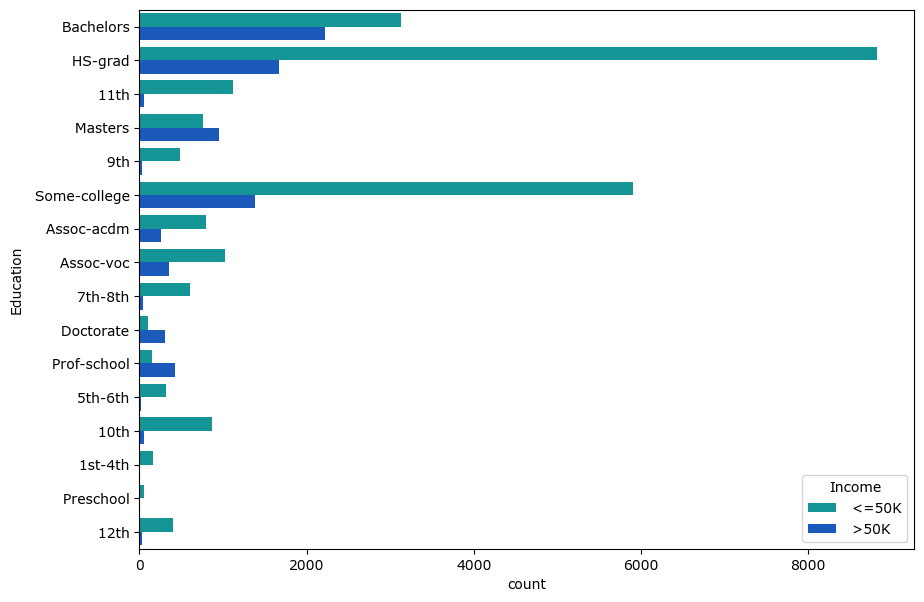

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(y='Education',hue='Income',data=data, palette='winter_r')
plt.show()

- We can see, High grade education has maximum <50K income folowed by Some college.
- Bachelors degree holder are having maximum >50K income followed by Hd Grade. 
- These are prof-school, masters and doctorate.
- We can also infer that higher eduction may provide better earnings.

<Axes: xlabel='Income', ylabel='Education_num'>

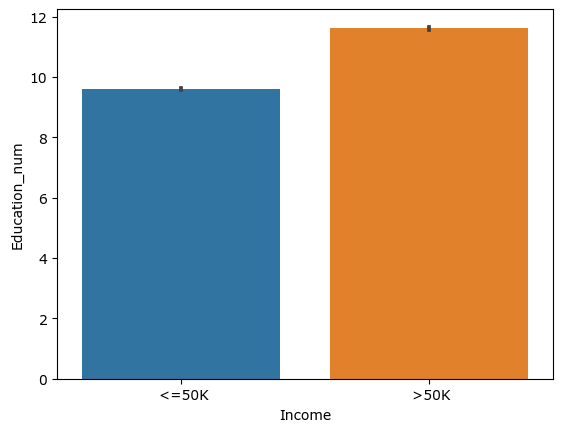

In [28]:
sns.barplot(y='Education_num',x='Income',data=data)

- We can see, >50K has maximum education_num.
- Upto 9 all are equally distributed.

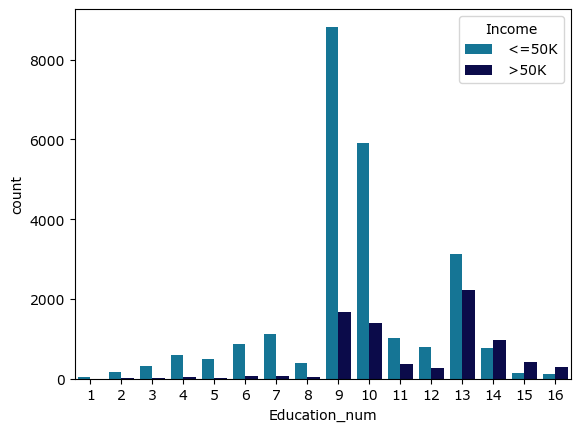

In [29]:
sns.countplot(x='Education_num', hue='Income',data=data, palette='ocean_r')
plt.show()

- Education_num 9 is having maximum <50K income followed by education_num 10.
- Education_num 13 gas maximum >50K income followed by 9. 

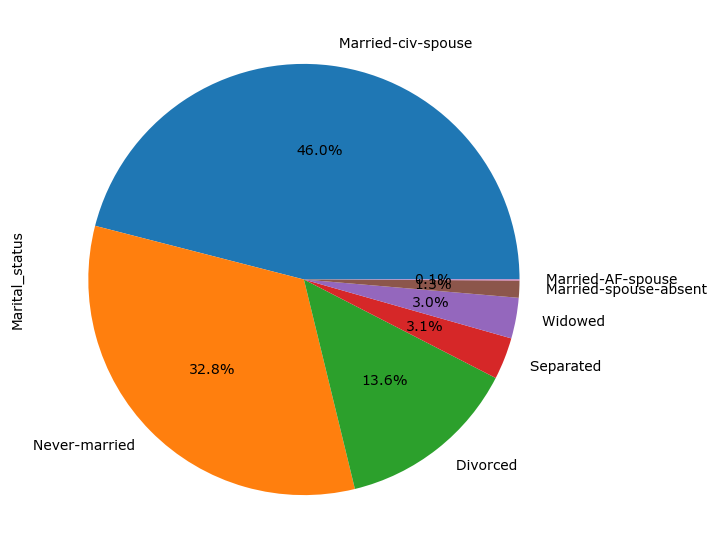

In [30]:
a = data['Marital_status'].value_counts()
plt.figure(figsize=(20,7))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, 46% couple are married and they are more contributiing then other.
- 32.8% people want to do Never-married.
- Only 0.3% married_Af-spouse are contributing in state.

<Axes: xlabel='count', ylabel='Marital_status'>

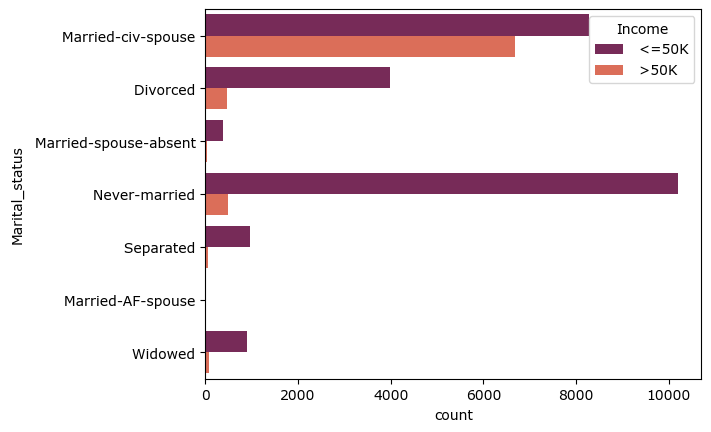

In [31]:
sns.countplot(y='Marital_status',data=data, hue='Income',palette='rocket')

- We can see, Never_married people are having leass 50K income followed by married_cuv_spouse.
- Married_AF_spouse are having lowest <50K income. ie.e income is lowest in married_Af_spouse.
- Maried couple are having maximum >50K income.

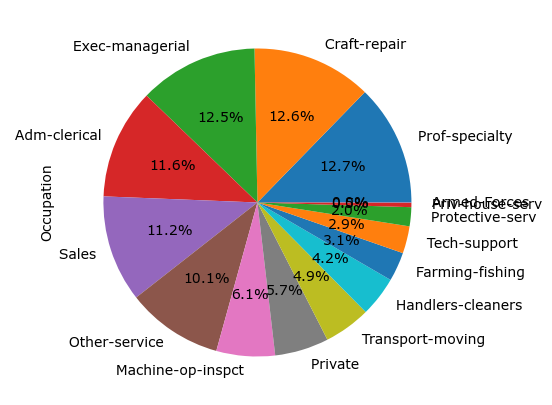

In [32]:
a = data['Occupation'].value_counts()
plt.figure(figsize=(10,5))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see,12.7% people are doing prof-speciality occupation ffolowed craft_repair i.e 12.6%.
- There are only 0.5% pople are doing Armed Forece job. 

<Axes: xlabel='count', ylabel='Occupation'>

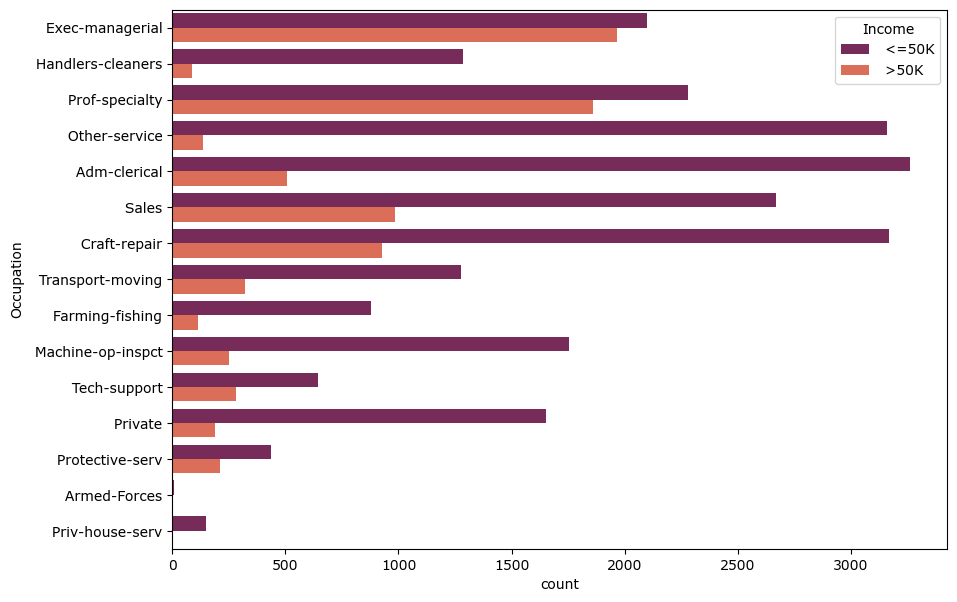

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(y='Occupation',data=data, hue='Income',palette='rocket')

- We can see, ADM_clearical doing occupation are maximum people. They have <50K income maximum followed by Other service.
- Executive managerial are having maximu >50K infollowed by  pro-speciality. 
- Armed Forces are having very low or very negligible poeple are doing this job. and havinvery low income.

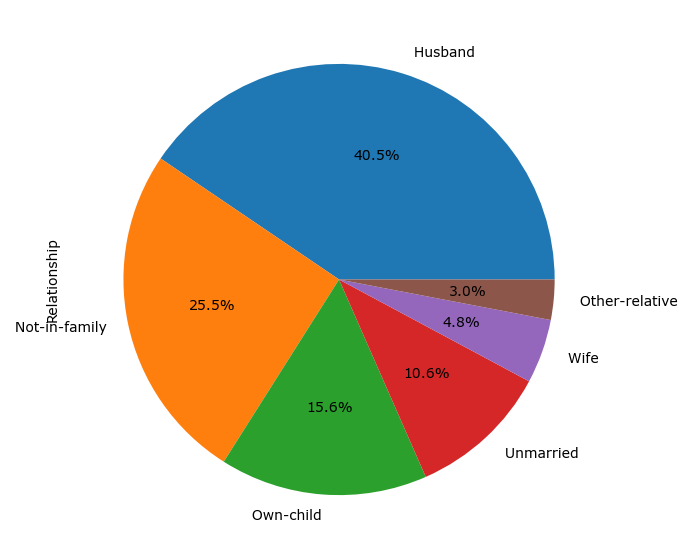

In [34]:
a = data['Relationship'].value_counts()
plt.figure(figsize=(20,7))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, Husband are more contributing in Growth then wife.
- Wife has 4.8% contributing in income.It means after the married women may quite thier job or they not proposed to do job.
- Not in familly has 25.5% chunk.
- Other-relative are have lowed contribution.

<Axes: xlabel='count', ylabel='Relationship'>

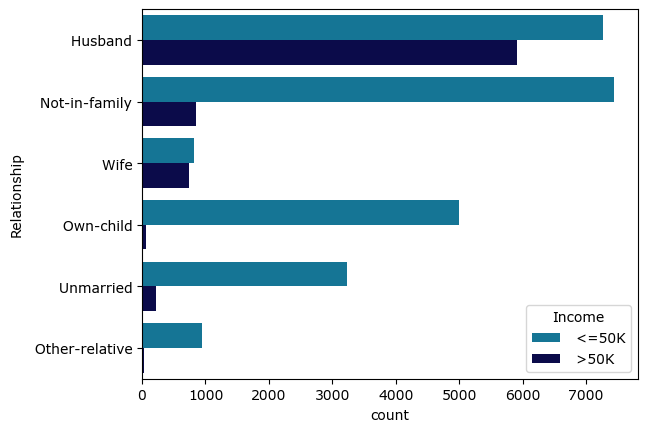

In [35]:
sns.countplot(y='Relationship',data=data, hue='Income',palette='ocean_r')

- We can see, Husband are most earnig are >50K income followed by Not-in-family.
- Not-in-family are having highest <50K income followed by Own-Child. It means that child are alos doing job.
- There is huge difference between the percentage of fall either groups except for "husband" and "wife".

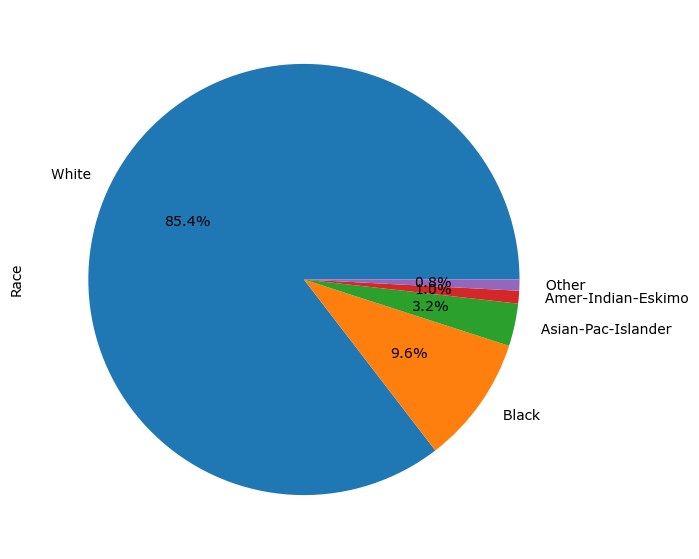

In [36]:
a = data['Race'].value_counts()
plt.figure(figsize=(10,7))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, White people are more in number followed by Black. It shows that white man supremacy.
- American-indian anthe are race people very low.

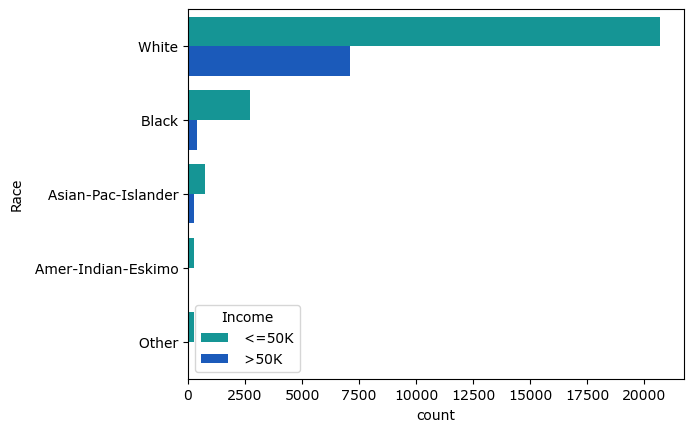

In [37]:
sns.countplot(y='Race',data=data, hue='Income',palette='winter_r')
plt.show()

 - We can see, disparity in income. White people are having maximum income other than.
 - Due to unequal distribution of income, racism are increase.

<Axes: xlabel='Sex', ylabel='count'>

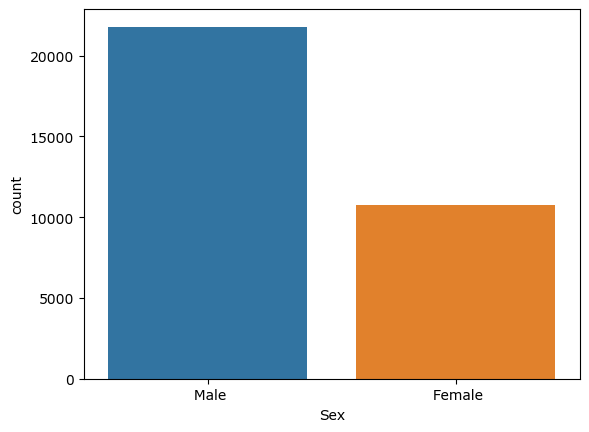

In [38]:
sns.countplot(x='Sex',data=data)

- We can see, Male are more then female.

<Axes: xlabel='Sex', ylabel='count'>

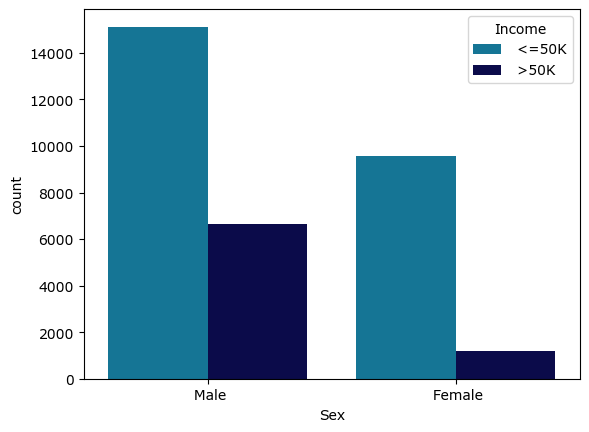

In [39]:
sns.countplot(x='Sex',data=data,hue='Income',palette='ocean_r')

- We can see, Male are having maximum >50K income then female.
- For country growth women participantion in labour force need to high.

<Axes: xlabel='Income', ylabel='Capital_gain'>

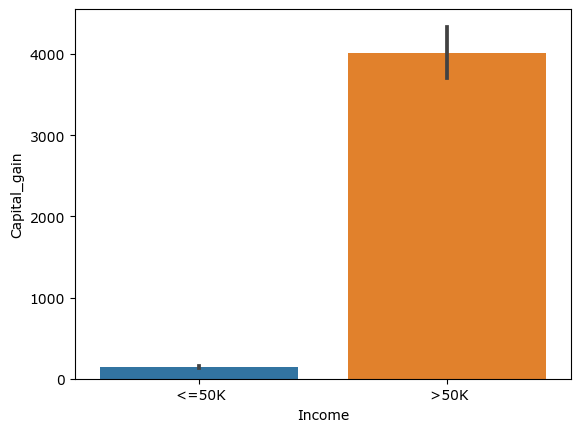

In [40]:
sns.barplot(x='Income',y='Capital_gain',data=data)

- We can see, >50K are having maximum capital_gain.
- Very low capital gain <50K income.

<Axes: xlabel='Income', ylabel='Capital_loss'>

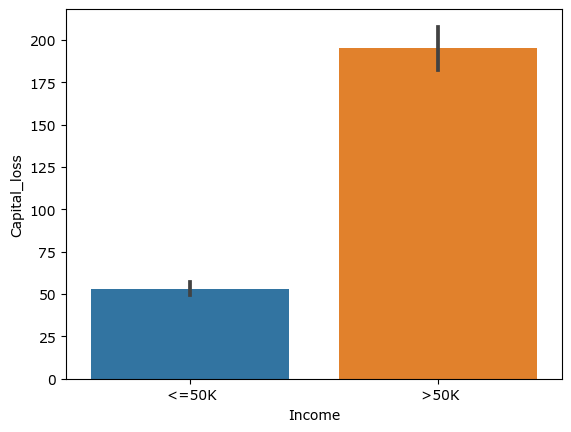

In [41]:
sns.barplot(x='Income',y='Capital_loss',data=data)

- .>50K are having maximum capital loss. Becouse it has maximum capital gain due to this thier capital loss also high.
- .<50K are having low capital loss becouse it has very low capital gain.

<Axes: xlabel='Income', ylabel='Hours_per_week'>

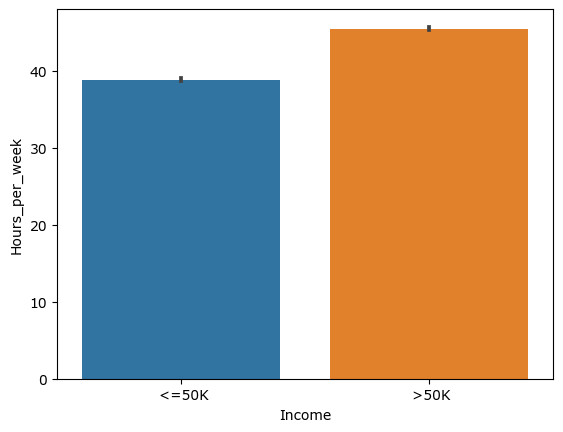

In [42]:
sns.barplot(x='Income',y='Hours_per_week',data=data)

- We can see, whose has income >50K they are doing mam hour job in week.
- And Those poeple ahaving less than <50K income they week hour also low.

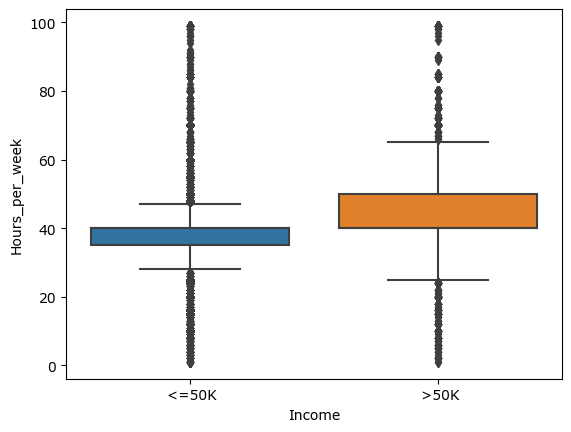

In [43]:
sns.boxplot(x="Income", y="Hours_per_week", data=data)
plt.show()

- Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
- Income group who earns <=50k has spend ~37 "hours-per-week".

<Axes: xlabel='count', ylabel='Native_country'>

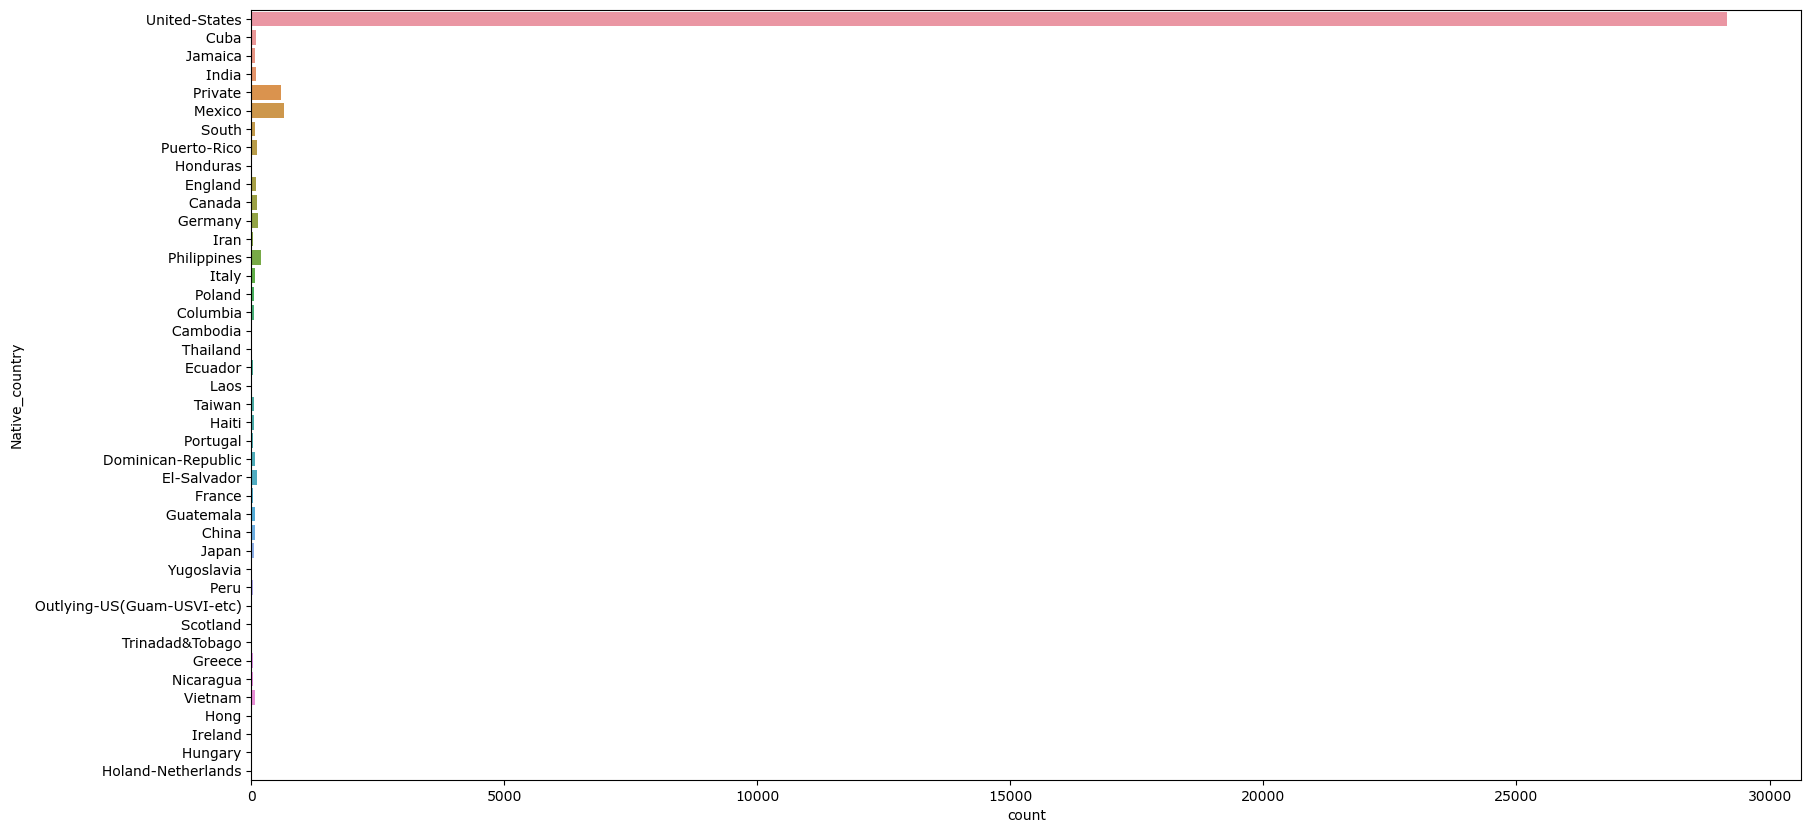

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(y='Native_country',data=data)

- Here maximum native country are from USA. It USA has maximum native country name.
- Mostly data are belong to USA.

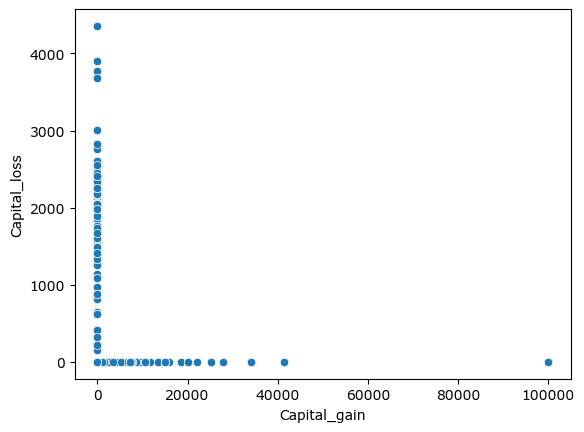

In [45]:
sns.scatterplot(x='Capital_gain',y='Capital_loss',data=data)
plt.show()

- We can see, there in no such relationship between Capital_gain and Capital_loss.
- If capital.gain is zero there is possibility of capital loss being high or above zero.
- If capital loss is zero there is possibility of capital.gain being high or above zero.

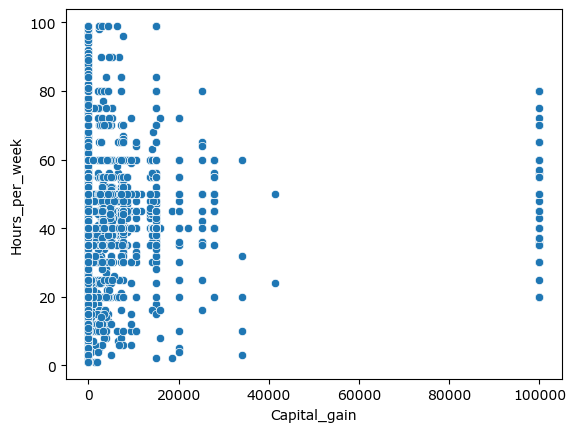

In [46]:
sns.scatterplot(x='Capital_gain',y='Hours_per_week',data=data)
plt.show()

- There is no relationship between both features.
- Upto 40K maximum Hours are lies.

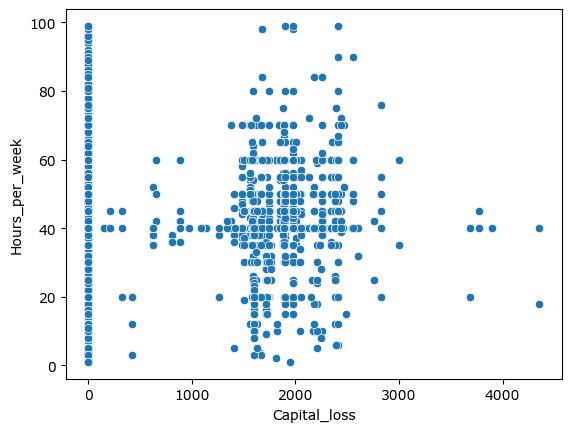

In [47]:
sns.scatterplot(x='Capital_loss',y='Hours_per_week',data=data)
plt.show()

- Here also no such relationship between two features.
- Maximum hours i.e.40 to 60 are having maximum capital loss.

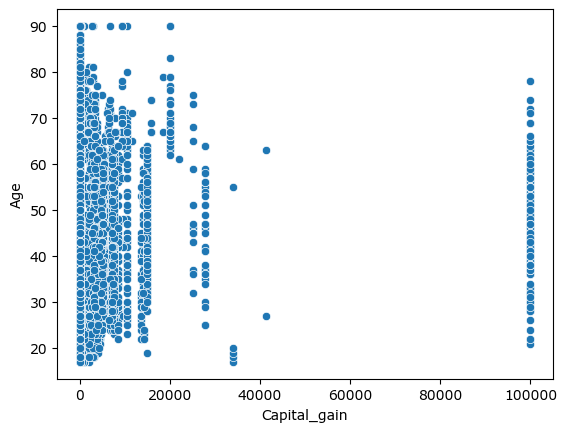

In [48]:
sns.scatterplot(x='Capital_gain',y='Age',data=data)
plt.show()

- There is no linear relationship between both feature.
- Upto 20K maximum capital gain for all age.

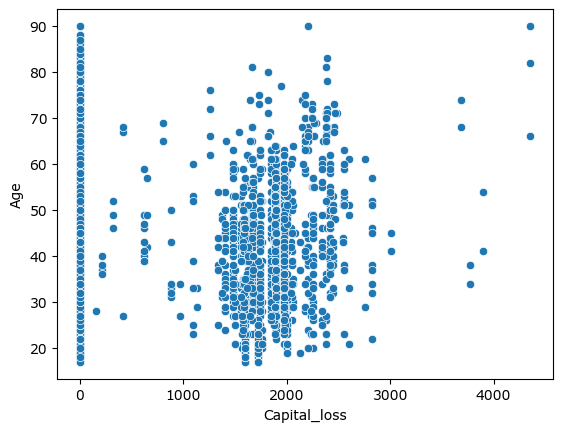

In [49]:
sns.scatterplot(x='Capital_loss',y='Age',data=data)
plt.show()

- There is no linear relationship between both feature.
- Upto 2K maximum capital loss for all age.

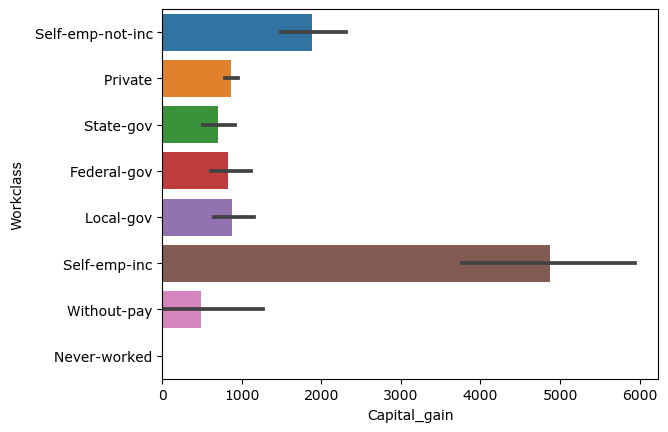

In [50]:
sns.barplot(y='Workclass',x='Capital_gain',data=data)
plt.show()

- We can see, Self employeed popele are having maximum capital gain followed by self_emp_not_inc.
- Without-pay has lowest capital gain.

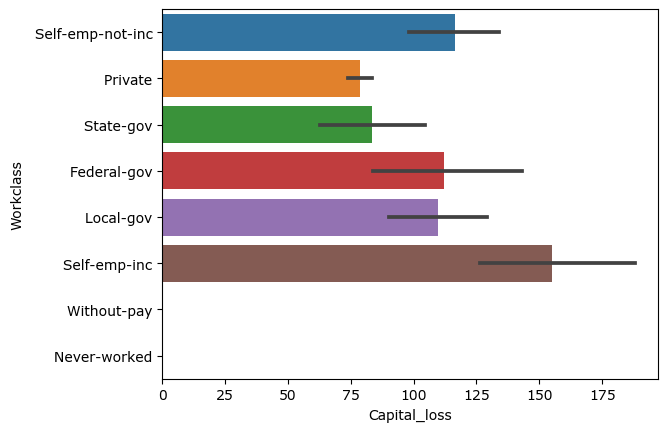

In [51]:
sns.barplot(y='Workclass',x='Capital_loss',data=data)
plt.show()

- Similary Self Employeed people has maximum capital loss becouse they are doing their own business.
- Those in without-pay workclass has lowest capital loss.

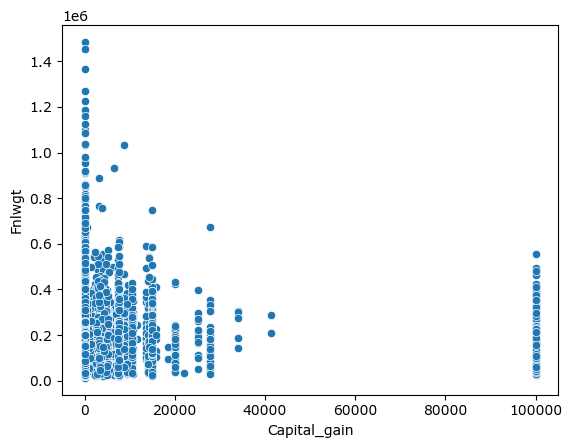

In [52]:
sns.scatterplot(x='Capital_gain',y='Fnlwgt',data=data)
plt.show()

- Maximum final weight is lies in upto 20K.
- No linear relationship between both feature.

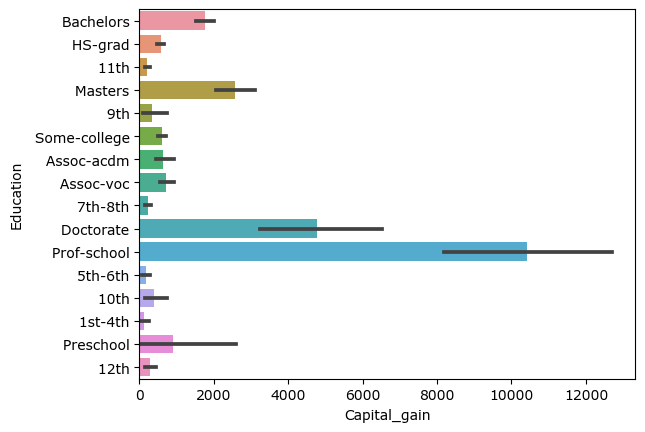

In [53]:
sns.barplot(y='Education',x='Capital_gain',data=data)
plt.show()

- We can see, Prof_shool has maximum capital gain followed by Doctorate.
- Below 10Th education has lowest capital gain.

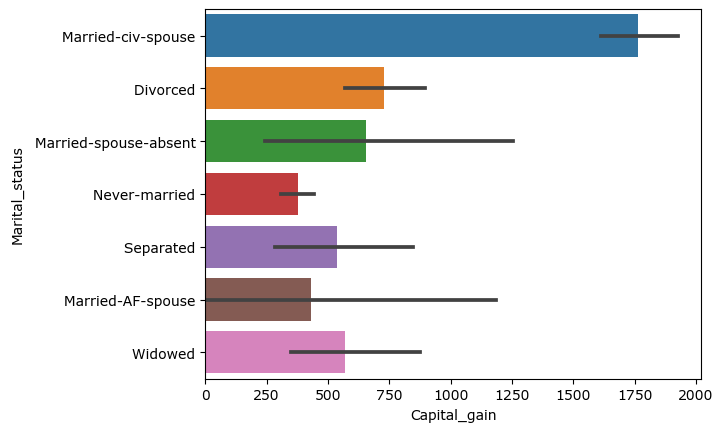

In [54]:
sns.barplot(y='Marital_status',x='Capital_gain',data=data)
plt.show()

- We can see, Marries-civ_spouse has maximum capital gain follwed by Divorced.
- Never-married people has lowest capital gain.

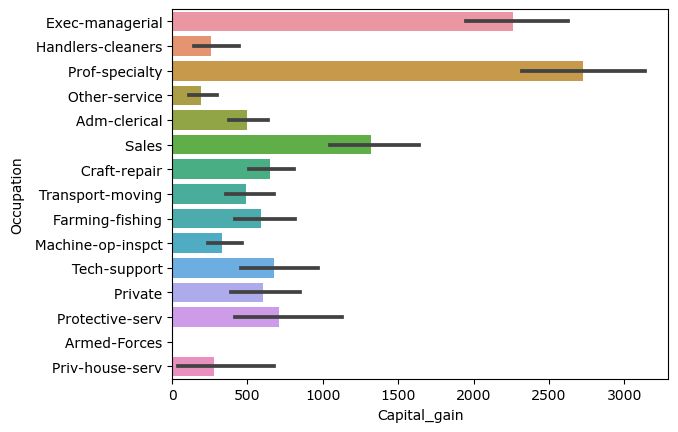

In [55]:
sns.barplot(y='Occupation',x='Capital_gain',data=data)
plt.show()

- We can see, prof-speciality has maximum capital gain. It means that those are doing prof_specality they have highest income and capital gain.
- Armed forces data are not available so other service doing people has lowest capital gain.

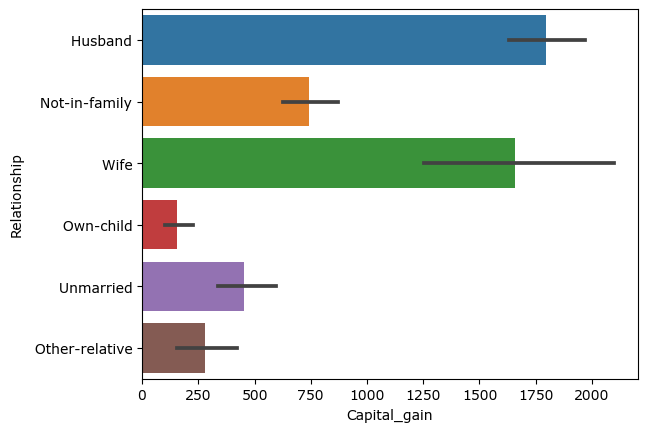

In [56]:
sns.barplot(y='Relationship',x='Capital_gain',data=data)
plt.show()

- We can see, Husband has maximum capital gain followed by wife. It means that. both are having equal salary.
- There is lowest capital gain in Own-child.

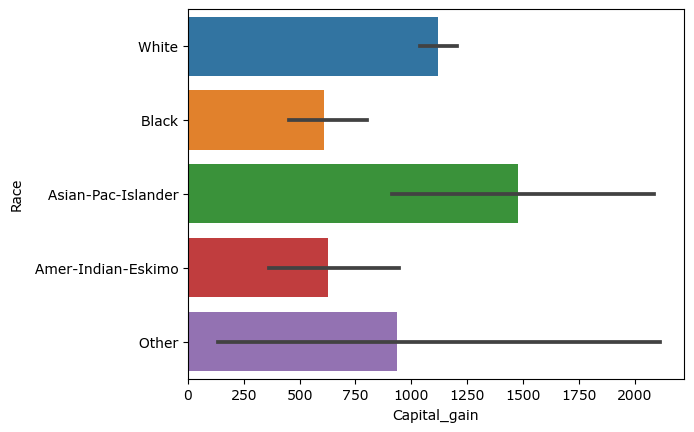

In [57]:
sns.barplot(y='Race',x='Capital_gain',data=data)
plt.show()

- Asia-Pac_islander is having maximum capital gain compare to other race. Becouse they are in less number and they mostly come for doing businnees with them.
- White Race people also in 2nd position whose has good capital gain.
- Black and American-Indian_Eskimo has lowest capital gain comparing to other.

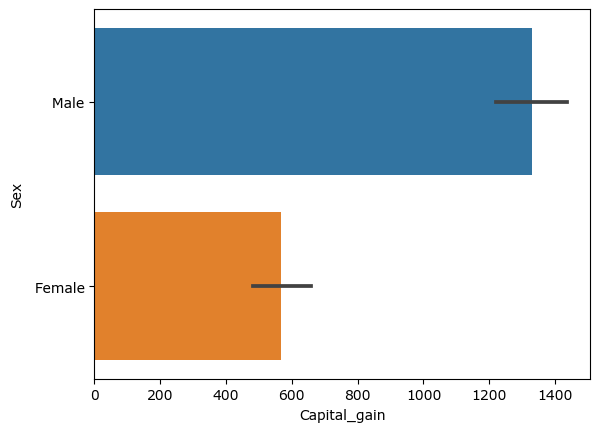

In [58]:
sns.barplot(y='Sex',x='Capital_gain',data=data)
plt.show()

- Male has maximum capital gian then female becouse they have maximum income also then women.

<Axes: xlabel='Capital_gain', ylabel='Native_country'>

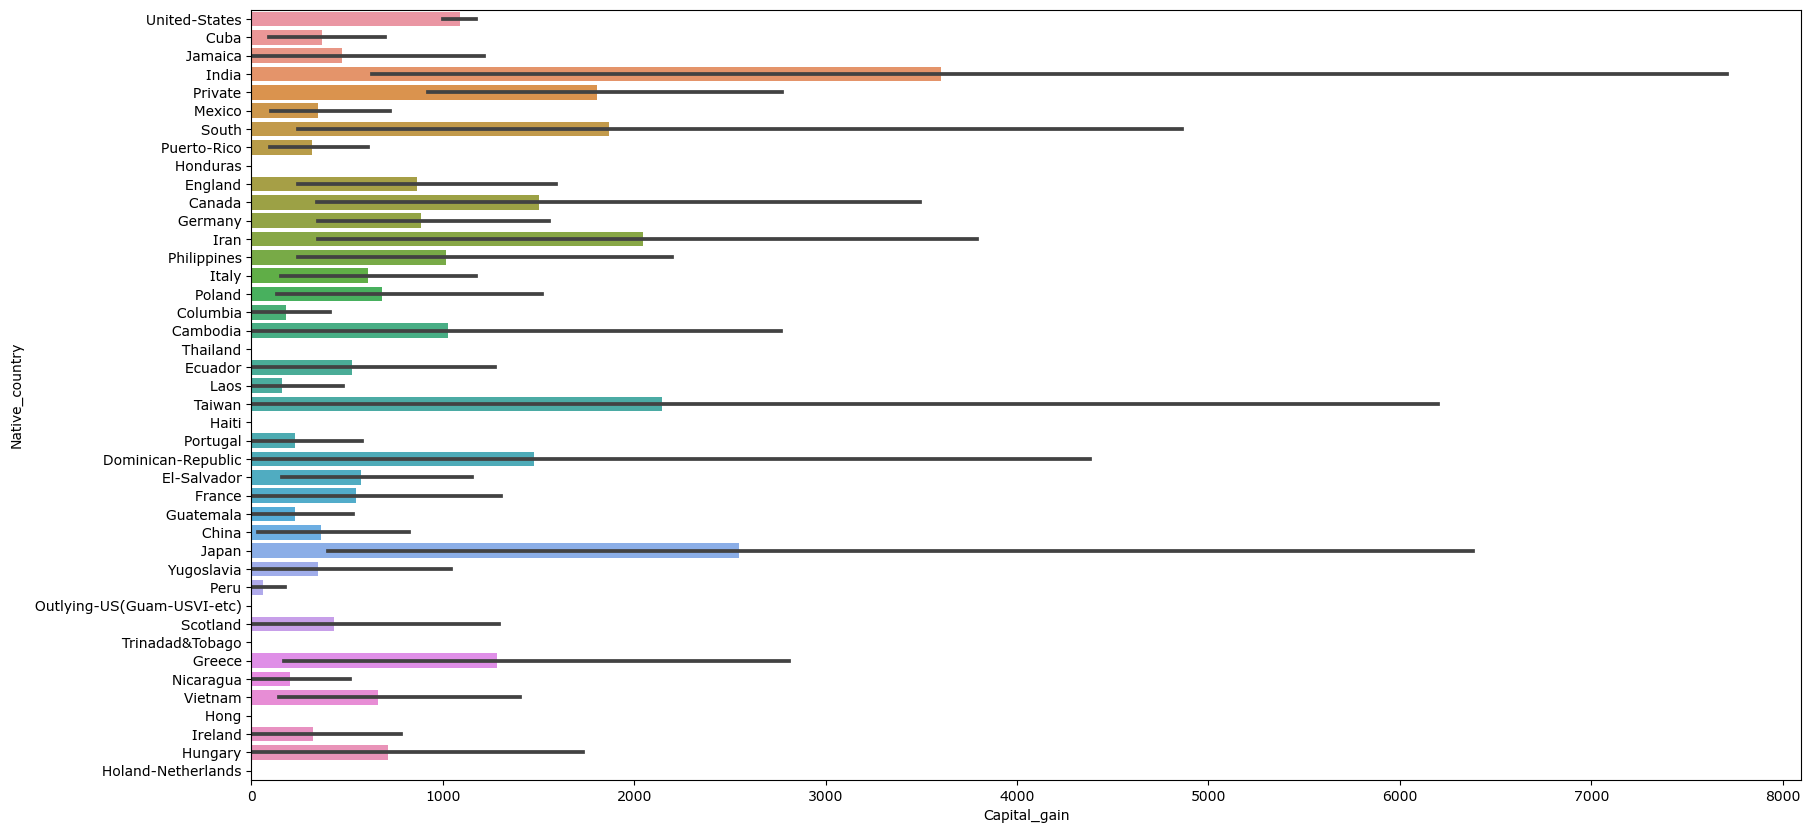

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(y='Native_country',data=data,x='Capital_gain')

- We can see, India has maximum capital gain followed by Japan.
- Peru has lowest capital gain.

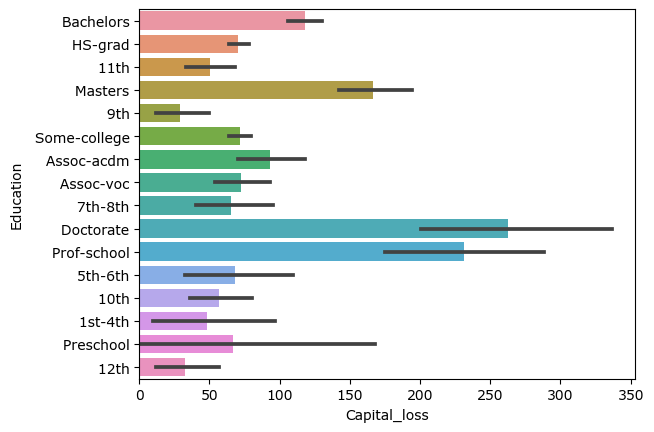

In [60]:
sns.barplot(y='Education',x='Capital_loss',data=data)
plt.show()

- Whose has education in Doctorate those also have maximum capital loss followed by Prof_shool.
- 12th Education has lowest capital loss.

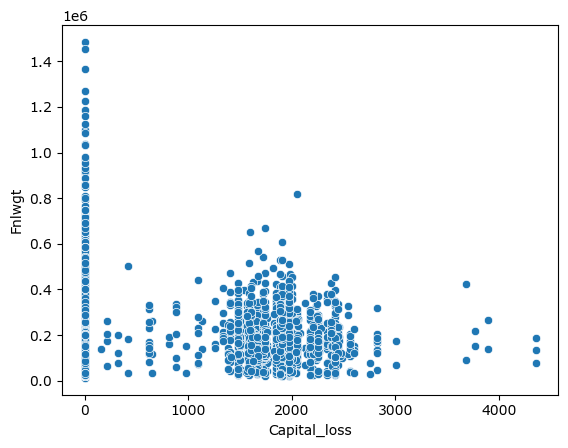

In [61]:
sns.scatterplot(x='Capital_loss',y='Fnlwgt',data=data)
plt.show()

- Maximum final weight is lies in 1500 to 3000.
- No linear relationship between both feature.

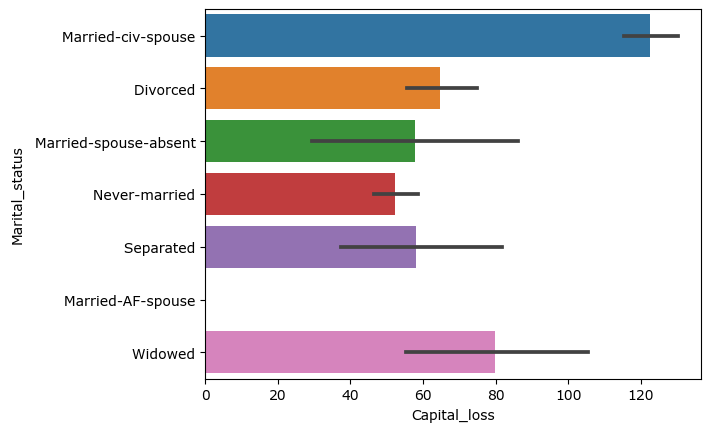

In [62]:
sns.barplot(y='Marital_status',x='Capital_loss',data=data)
plt.show()

- Married couple has maximum capital loss followed by Widowed.
- No capital loss or negligible capital loss in married_af_spouse.

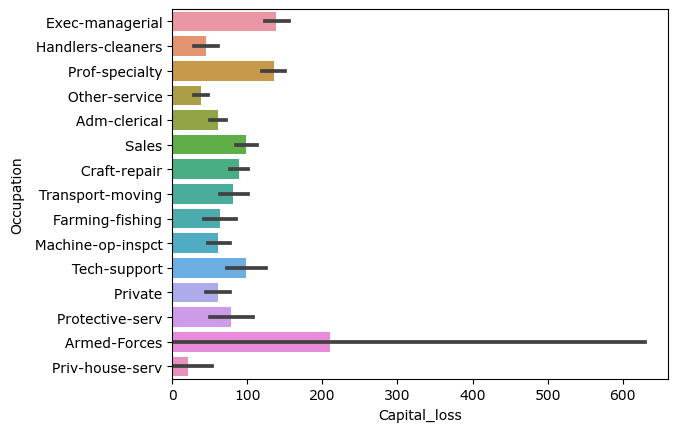

In [63]:
sns.barplot(y='Occupation',x='Capital_loss',data=data)
plt.show()

- We can see, that armed force has maximum capital loss.

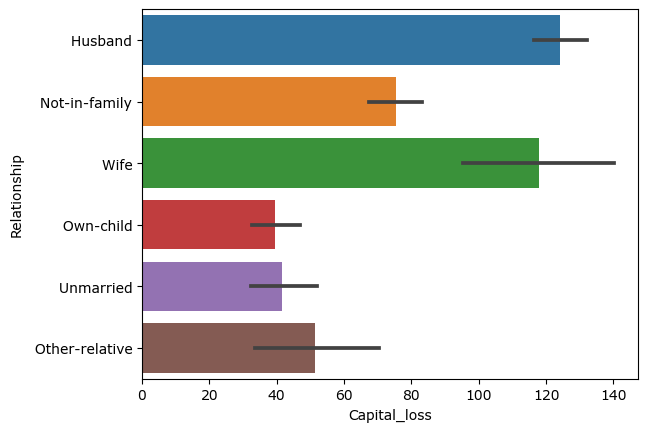

In [64]:
sns.barplot(y='Relationship',x='Capital_loss',data=data)
plt.show()

- Husband has maximum capital loss followed by wife.
- Own-child has lowest capital loss.

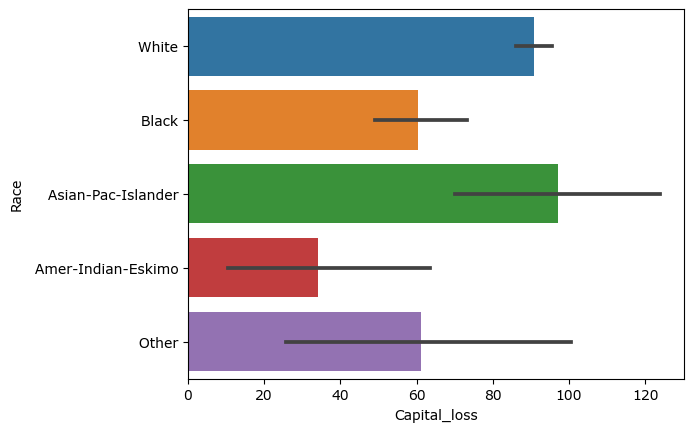

In [65]:
sns.barplot(y='Race',x='Capital_loss',data=data)
plt.show()

- Asia-Pac-Islander race has maximum capital loss followed white race.
- Amer_Indian_ESkimo has lowes capital loss comparing to other.

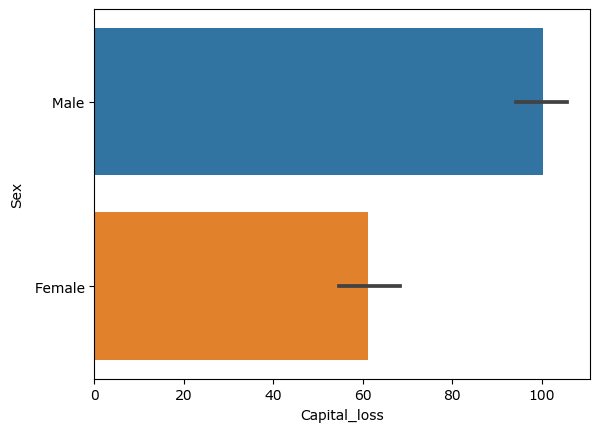

In [66]:
sns.barplot(y='Sex',x='Capital_loss',data=data)
plt.show()

- Male has highest capital loss then female.

<Axes: xlabel='Capital_loss', ylabel='Native_country'>

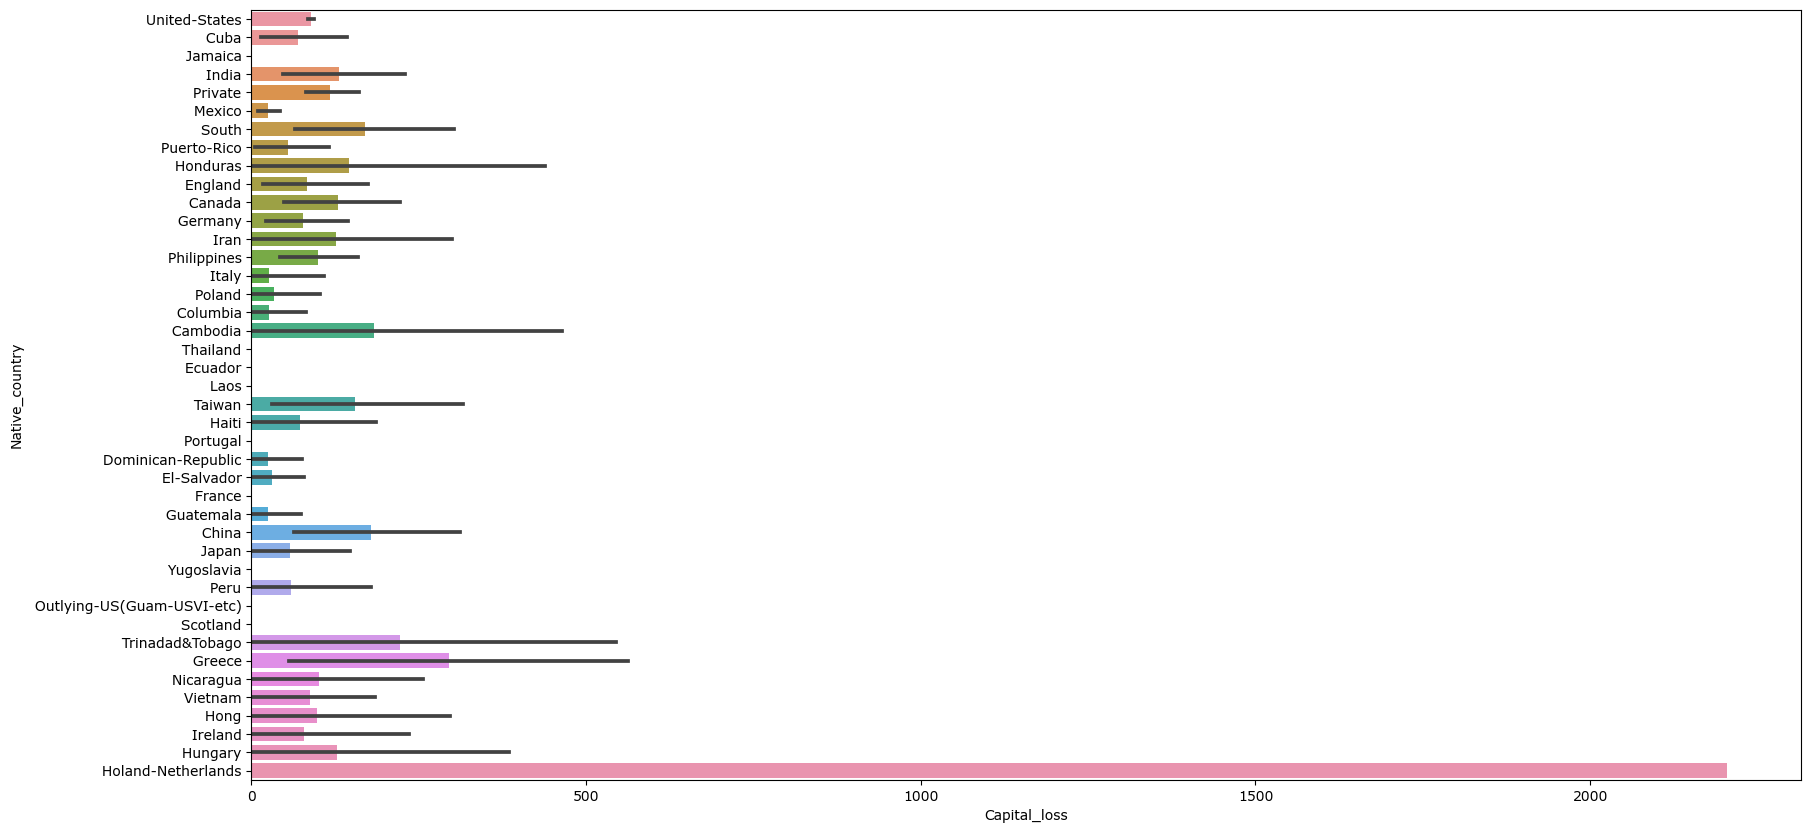

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(y='Native_country',data=data,x='Capital_loss')

- Holand_netherland has highest capital loss followed by Greece.
- Columbia has lowest capital loss.

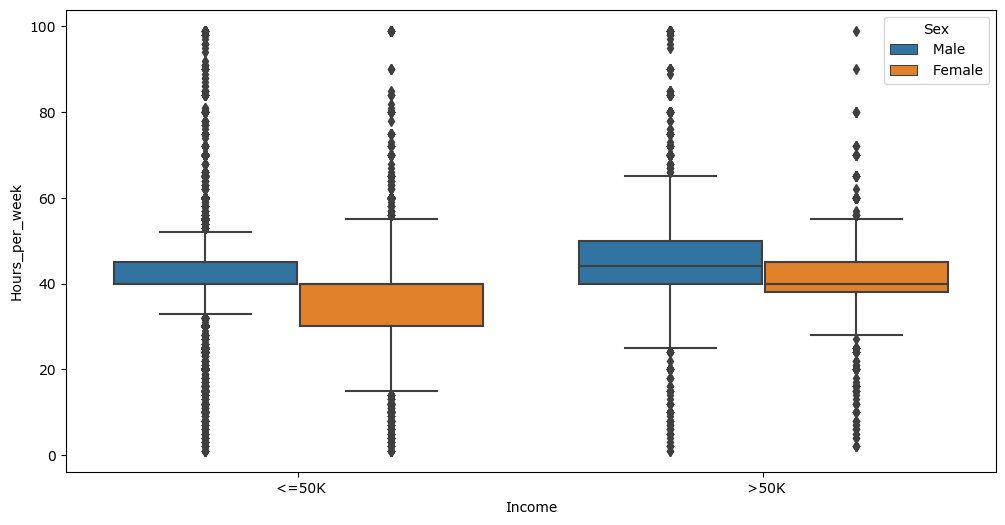

In [68]:
# Multivariate Analysis between "income", "hours-per-week", "gender"
plt.figure(figsize=(12,6))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Sex',data=data)
plt.show()

- The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
- Females have more flexible working hours per week in the income groups who earns <=50k.
- Males have more flexible working hours per week in the income groups who earns <=50k

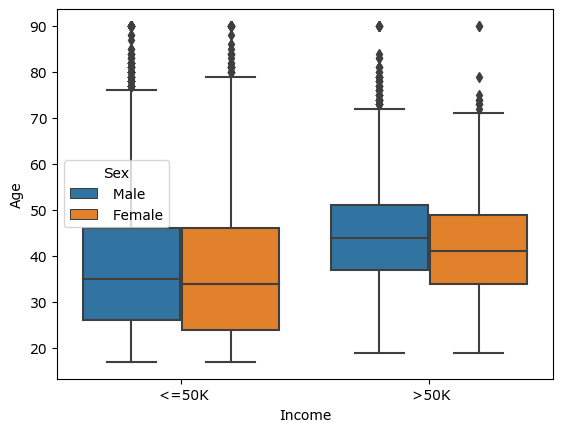

In [69]:
# Multivariate analysis between "income", "age", "gender"
sns.boxplot(x="Income", y="Age",hue="Sex",data=data)
plt.show()

- Mean "age" of Females who earn less than 50k has very minute difference than the Mean "age" of males who earn less than 50k.
- But the Mean "age" of Females who earn greater than 50k has age difference of 2-3years than the Mean "age" of males who earn greater than 50k.

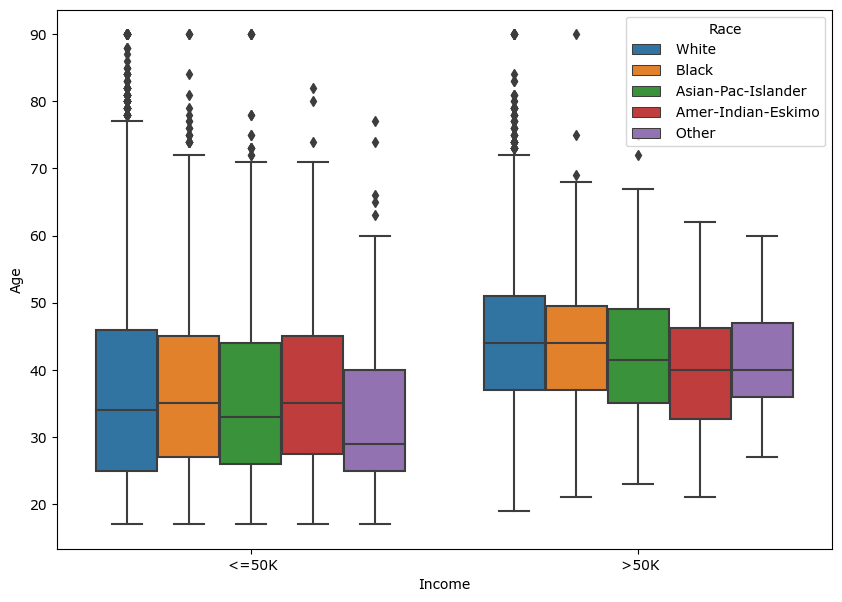

In [70]:
# Multivariate analysis between "income", "age", "race"
plt.figure(figsize=(10,7))
sns.boxplot(x="Income", y="Age",hue="Race",data=data)
plt.show()

- The mean "age" for other race is lower than the other race i.e.white, black etc in the Income group who earns <=50k.
- We can see, Low income i.e.<50K has lower age where in high income i.e. >50K has higher age.

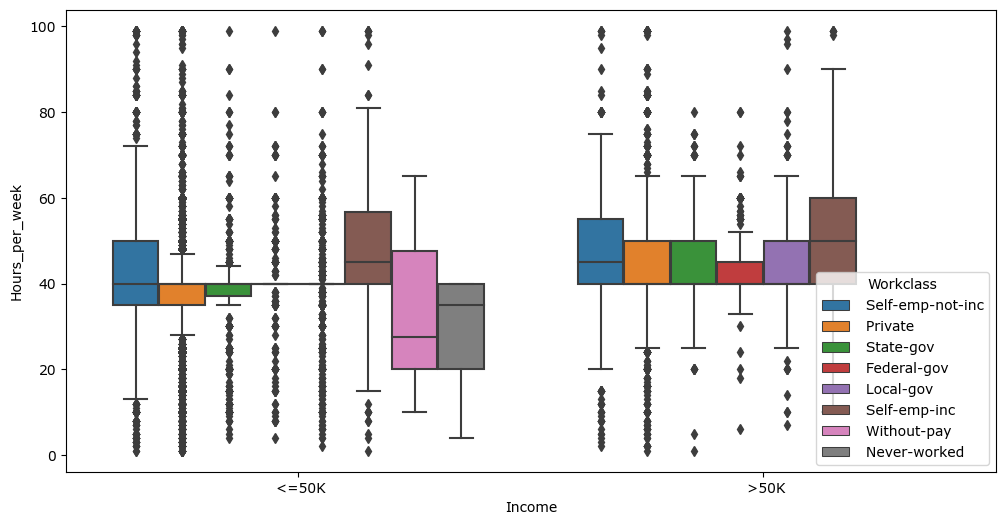

In [71]:
# Multivariate Analysis between "income", "hours-per-week", "workclass"
plt.figure(figsize=(12,6))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Workclass',data=data)
plt.show()

- Self-emp-inc has maximum hours of working in week in both class i.e. <50K and >50K.
- Whereas Without-Pay and Never-worked look like a same class so I considered them No worked workclass. In this workclass has lowest income becouse they have low working hour.
- Main observation is If spend maximum hour of week then you will have maximum income.

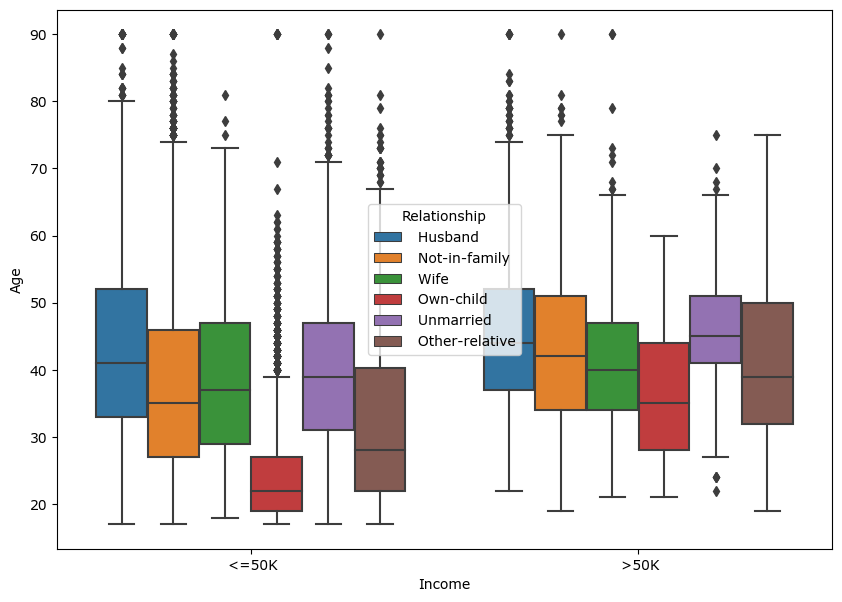

In [72]:
# Multivariate analysis between "income", "age", "relationship"
plt.figure(figsize=(10,7))
sns.boxplot(x="Income", y="Age",hue="Relationship",data=data)
plt.show()

- We can see, Husband has median age ~41 years in <50K whereas in same class Own child has ~22 year of age.
- But in >50K income, Husband and wife both are having nearly 43 and 39 years.

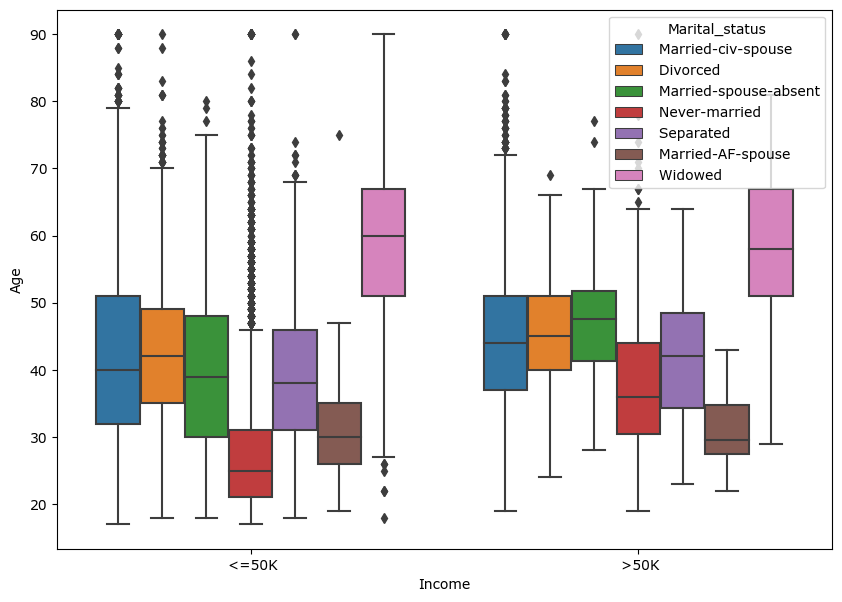

In [73]:
# Multivariate analysis between "income", "age", "marital_status"
plt.figure(figsize=(10,7))
sns.boxplot(x="Income", y="Age",hue="Marital_status",data=data)
plt.show()

- In a <50K income, Widowed has median age nearly 60 years, similarly, In >50K income widowed has median age 58 year. It means that, both income group they have nearly 58 to 60 year of age.
- Never-married has median age25 in <50K income group whereas in >50K income group has 35 year of age.

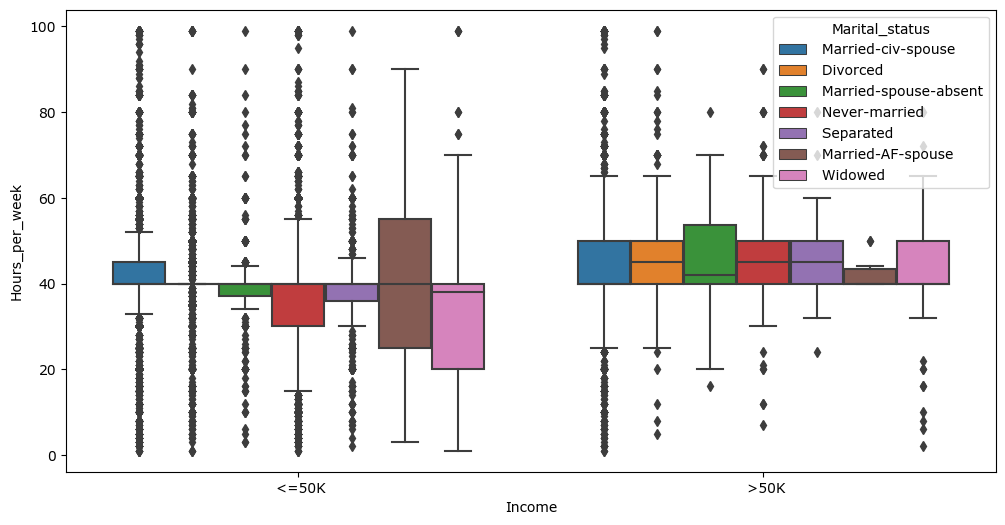

In [74]:
# Multivariate Analysis between "income", "hours-per-week", "Marital_status"
plt.figure(figsize=(12,6))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Marital_status',data=data)
plt.show()

- In <50K income group, median hour in week is nearly very close for all catergories. Like marries_AF-spouse are median hour of week 40 in <50K group whereas in >50K group 42 median hour of weeek.
- We can observed here is that high income group i.e. >50K where all are spending more time then <50K group.

<Axes: xlabel='Hours_per_week', ylabel='Capital_gain'>

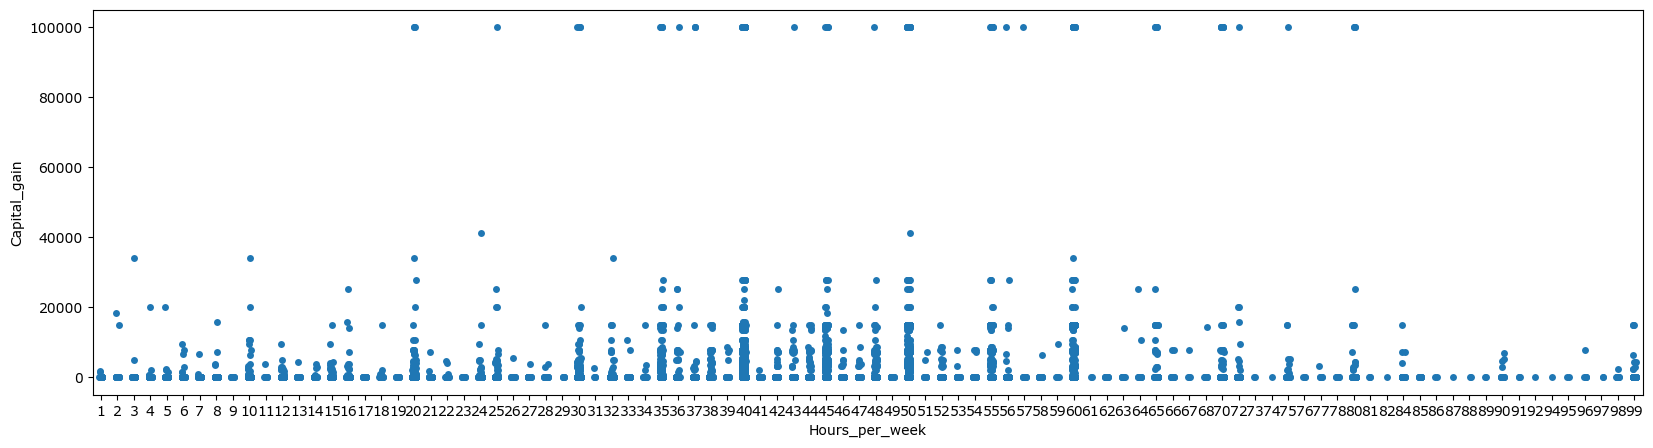

In [75]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Hours_per_week', y= 'Capital_gain', data=data)

- Majority of people can be working for 40,50 and 60 hours per week and capital gain seems to be increasing.
- There are few people working for 99 hours per week but doesn't seem to make high capital gain. 

<Axes: xlabel='Age', ylabel='Capital_gain'>

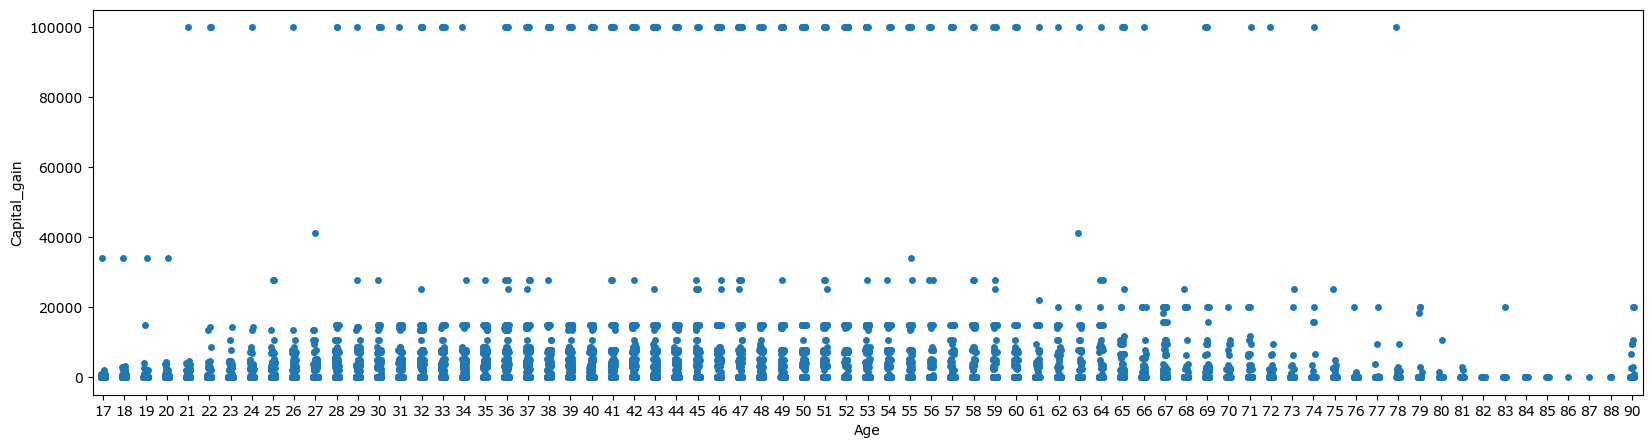

In [76]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Age', y= 'Capital_gain', data = data,)

- Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90

<Axes: xlabel='Income', ylabel='count'>

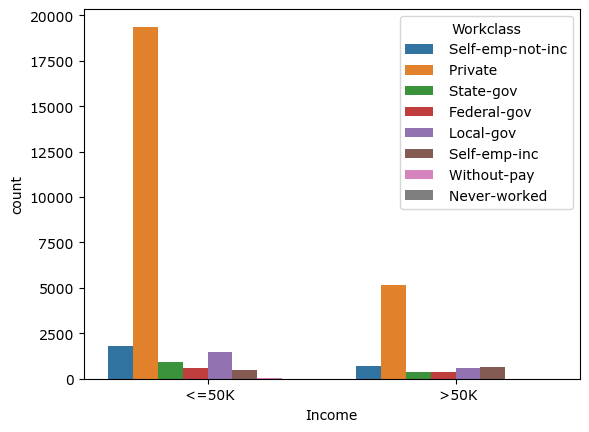

In [77]:
#Plotting workclass corresponding to the income
sns.countplot(x = 'Income', hue = 'Workclass', data = data)

- We can see, Private sector has highest income in both categories.
- Similarly Self emp_inc has low income in <50K class, while ?(other) has low income in class >50K.

<Axes: xlabel='Income', ylabel='count'>

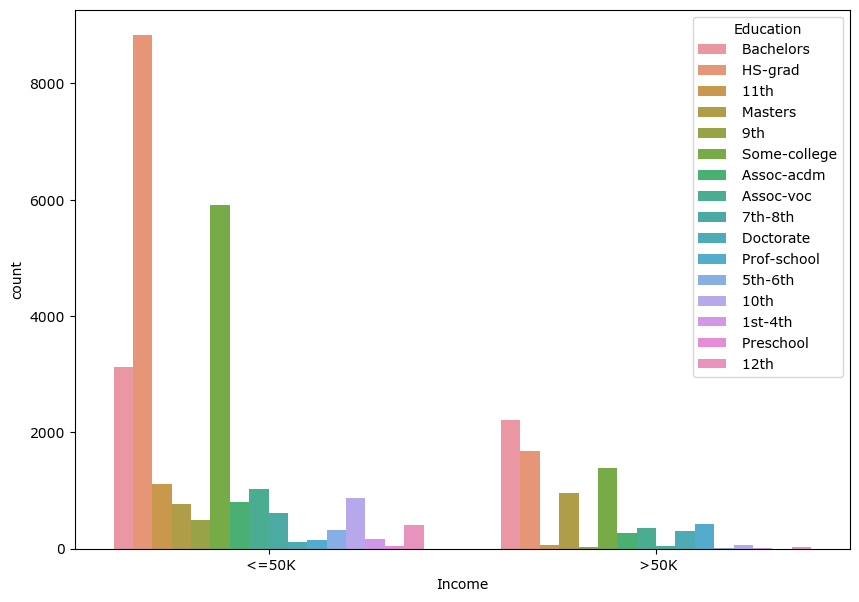

In [78]:
#Plotting Education corresponding to the Income
plt.figure(figsize=(10,7))
sns.countplot(x = 'Income', hue = 'Education', data = data)

- Who has education Hs-grad they have a maximum income in both class i.e. <50K and >50K.
- Similarly,Pre-school has lowest income in both class i.e. <50K and > 50K.

## 4. Encoding of DataFrame

In [79]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
df_cols=("Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income")
for i in df_cols:
    data[i]=le.fit_transform(data[i])

In [82]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
3,28,3,338409,9,13,2,10,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,39,0


## 5.  Describe the Dataset

In [83]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.475676,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,37.217107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,4.357023,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.328464,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in Capital_gain and Capital_loss is high, columns is considerable indicating presence of outliers.
 - 25%, 50% quantile, in this quantile values is 0 in Capital_gain and capital_loss.
 

## 6. Correlation of the features with target column

In [84]:
data.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023083
Occupation        0.048291
Race              0.071853
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

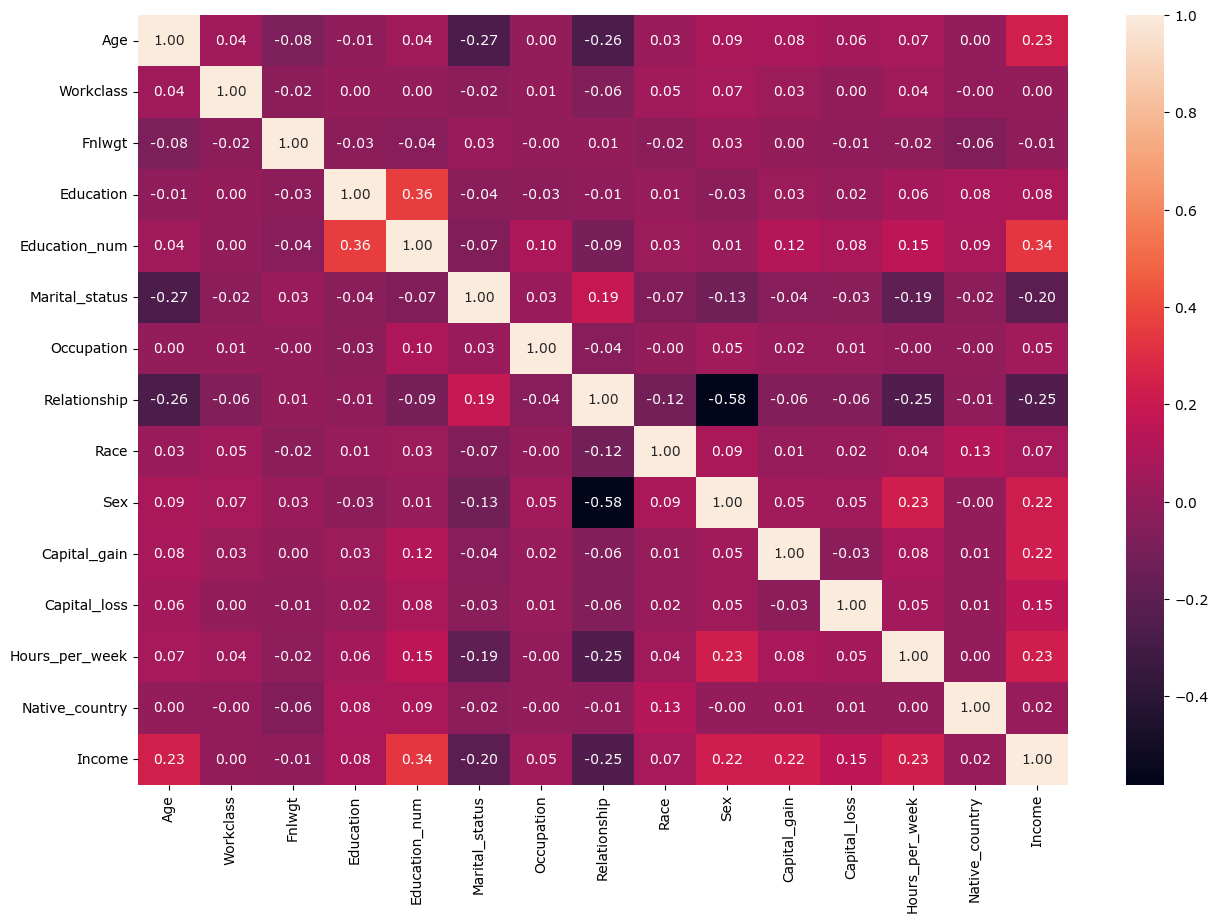

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. Age has 23% positive correlation with target column.
 2. Workclass has 0% positive correlation with target column.
 3. Education_num has 35% positve correlation with target column.
 4. Marital_status has 20% negative correlation with target column.
 5. Relationship has 25% negative correlation with target columns.
 6. Race has 7% positive correlation with target column.
 7. Sex has 22% positive correlation with target column.
 8. Capital_gain has 22% positive correlation with target column.
 9. Capital_loss has 15% positve correlation with target column.
 10. Hour_per_week has 23% positive correlation with target column.

## 7. Visualizing correlation of feature columns with label column.

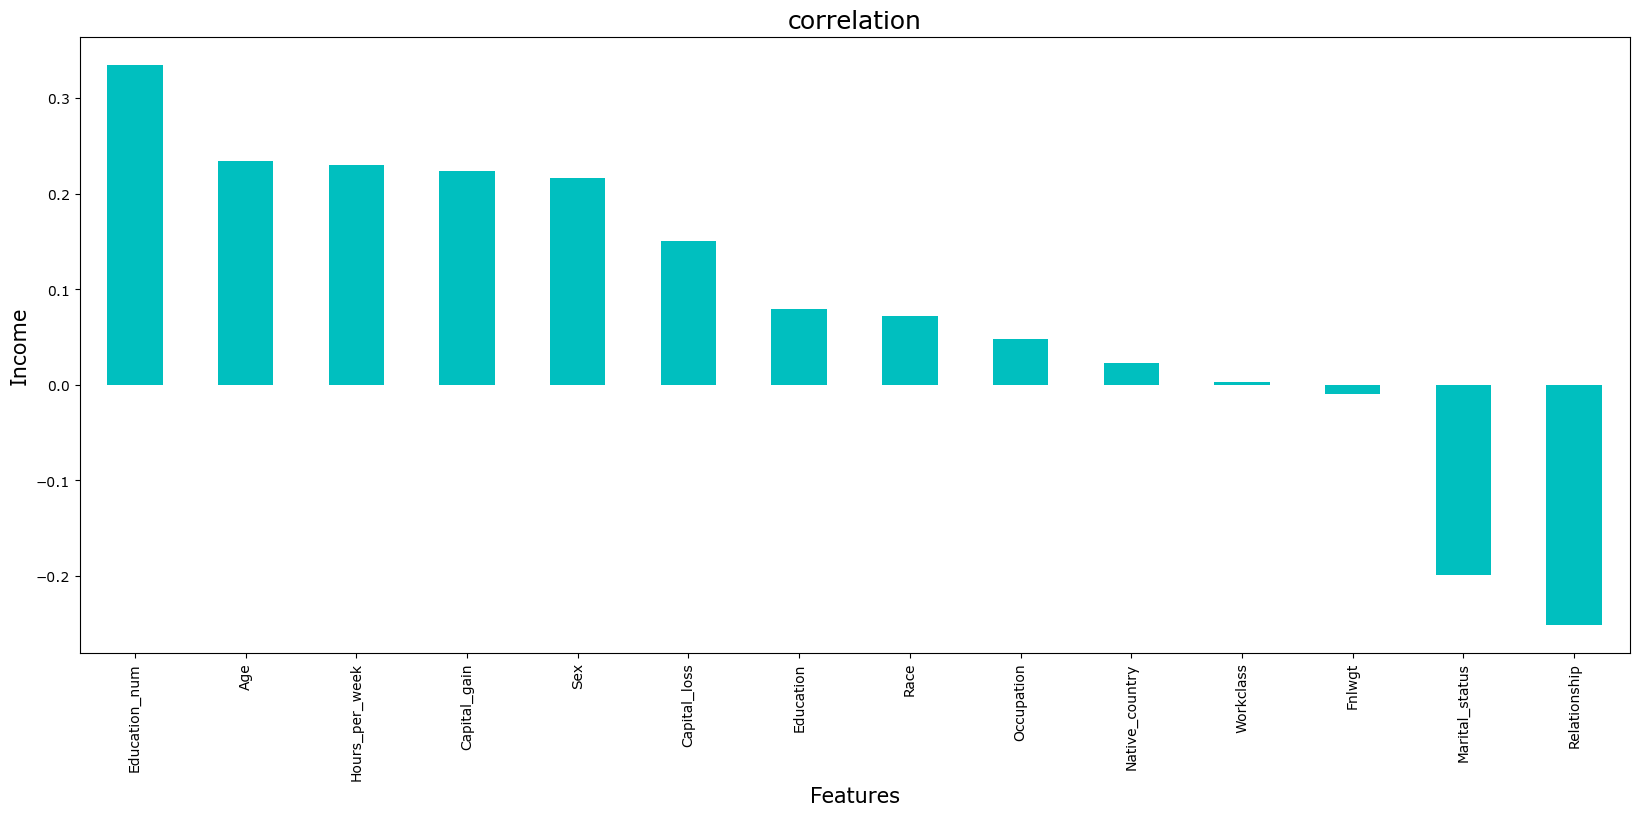

In [86]:
plt.figure(figsize = (20,8))
data.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that Education_num, Age and Hour_per_week have the highest positive correlation with Income.
- While Relationship and Marital_status have the highest negative correlation with Income.

## 8. Checking Distribution of data

In [87]:
data.shape

(32560, 15)

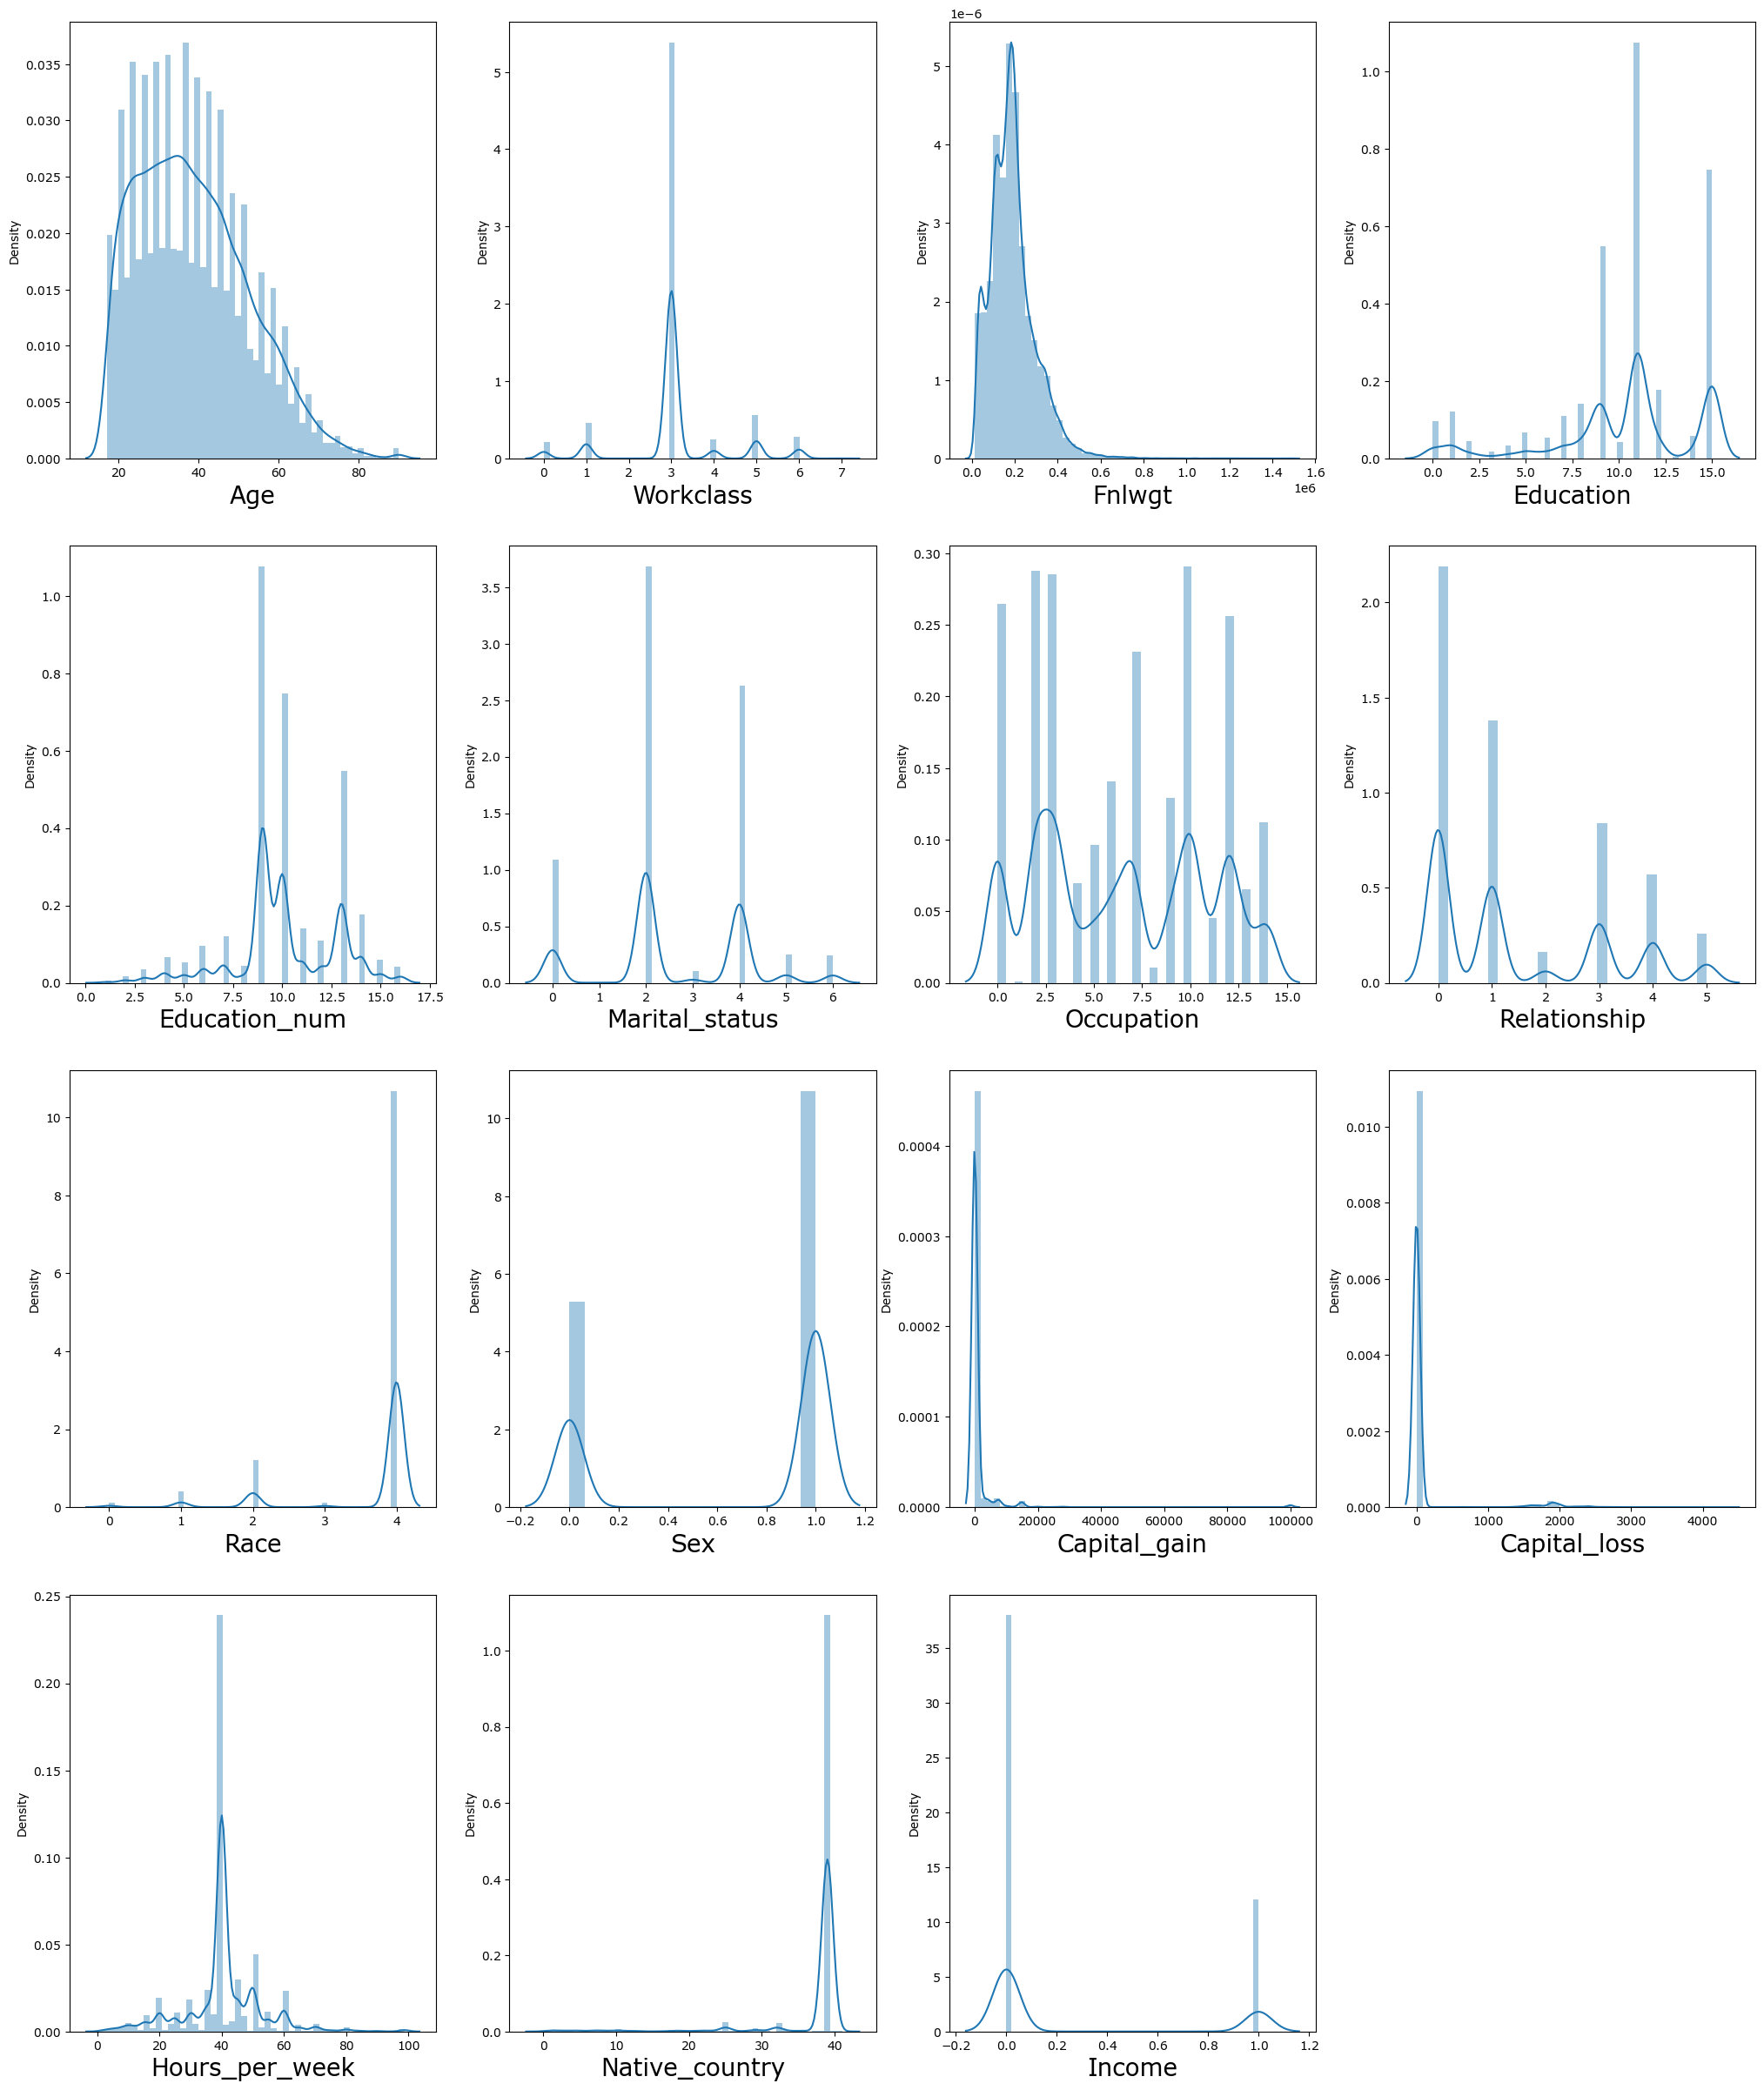

In [88]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, all categorical data have skewness.
- Age, Capital_gain and capital_loss have positively skewed.
- Hour_per_week has little normaly distributed.

In [89]:
data.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.090052
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.058159
Income             1.212383
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Almost all continuous data are having skewness.

## 9. Checking Outliers

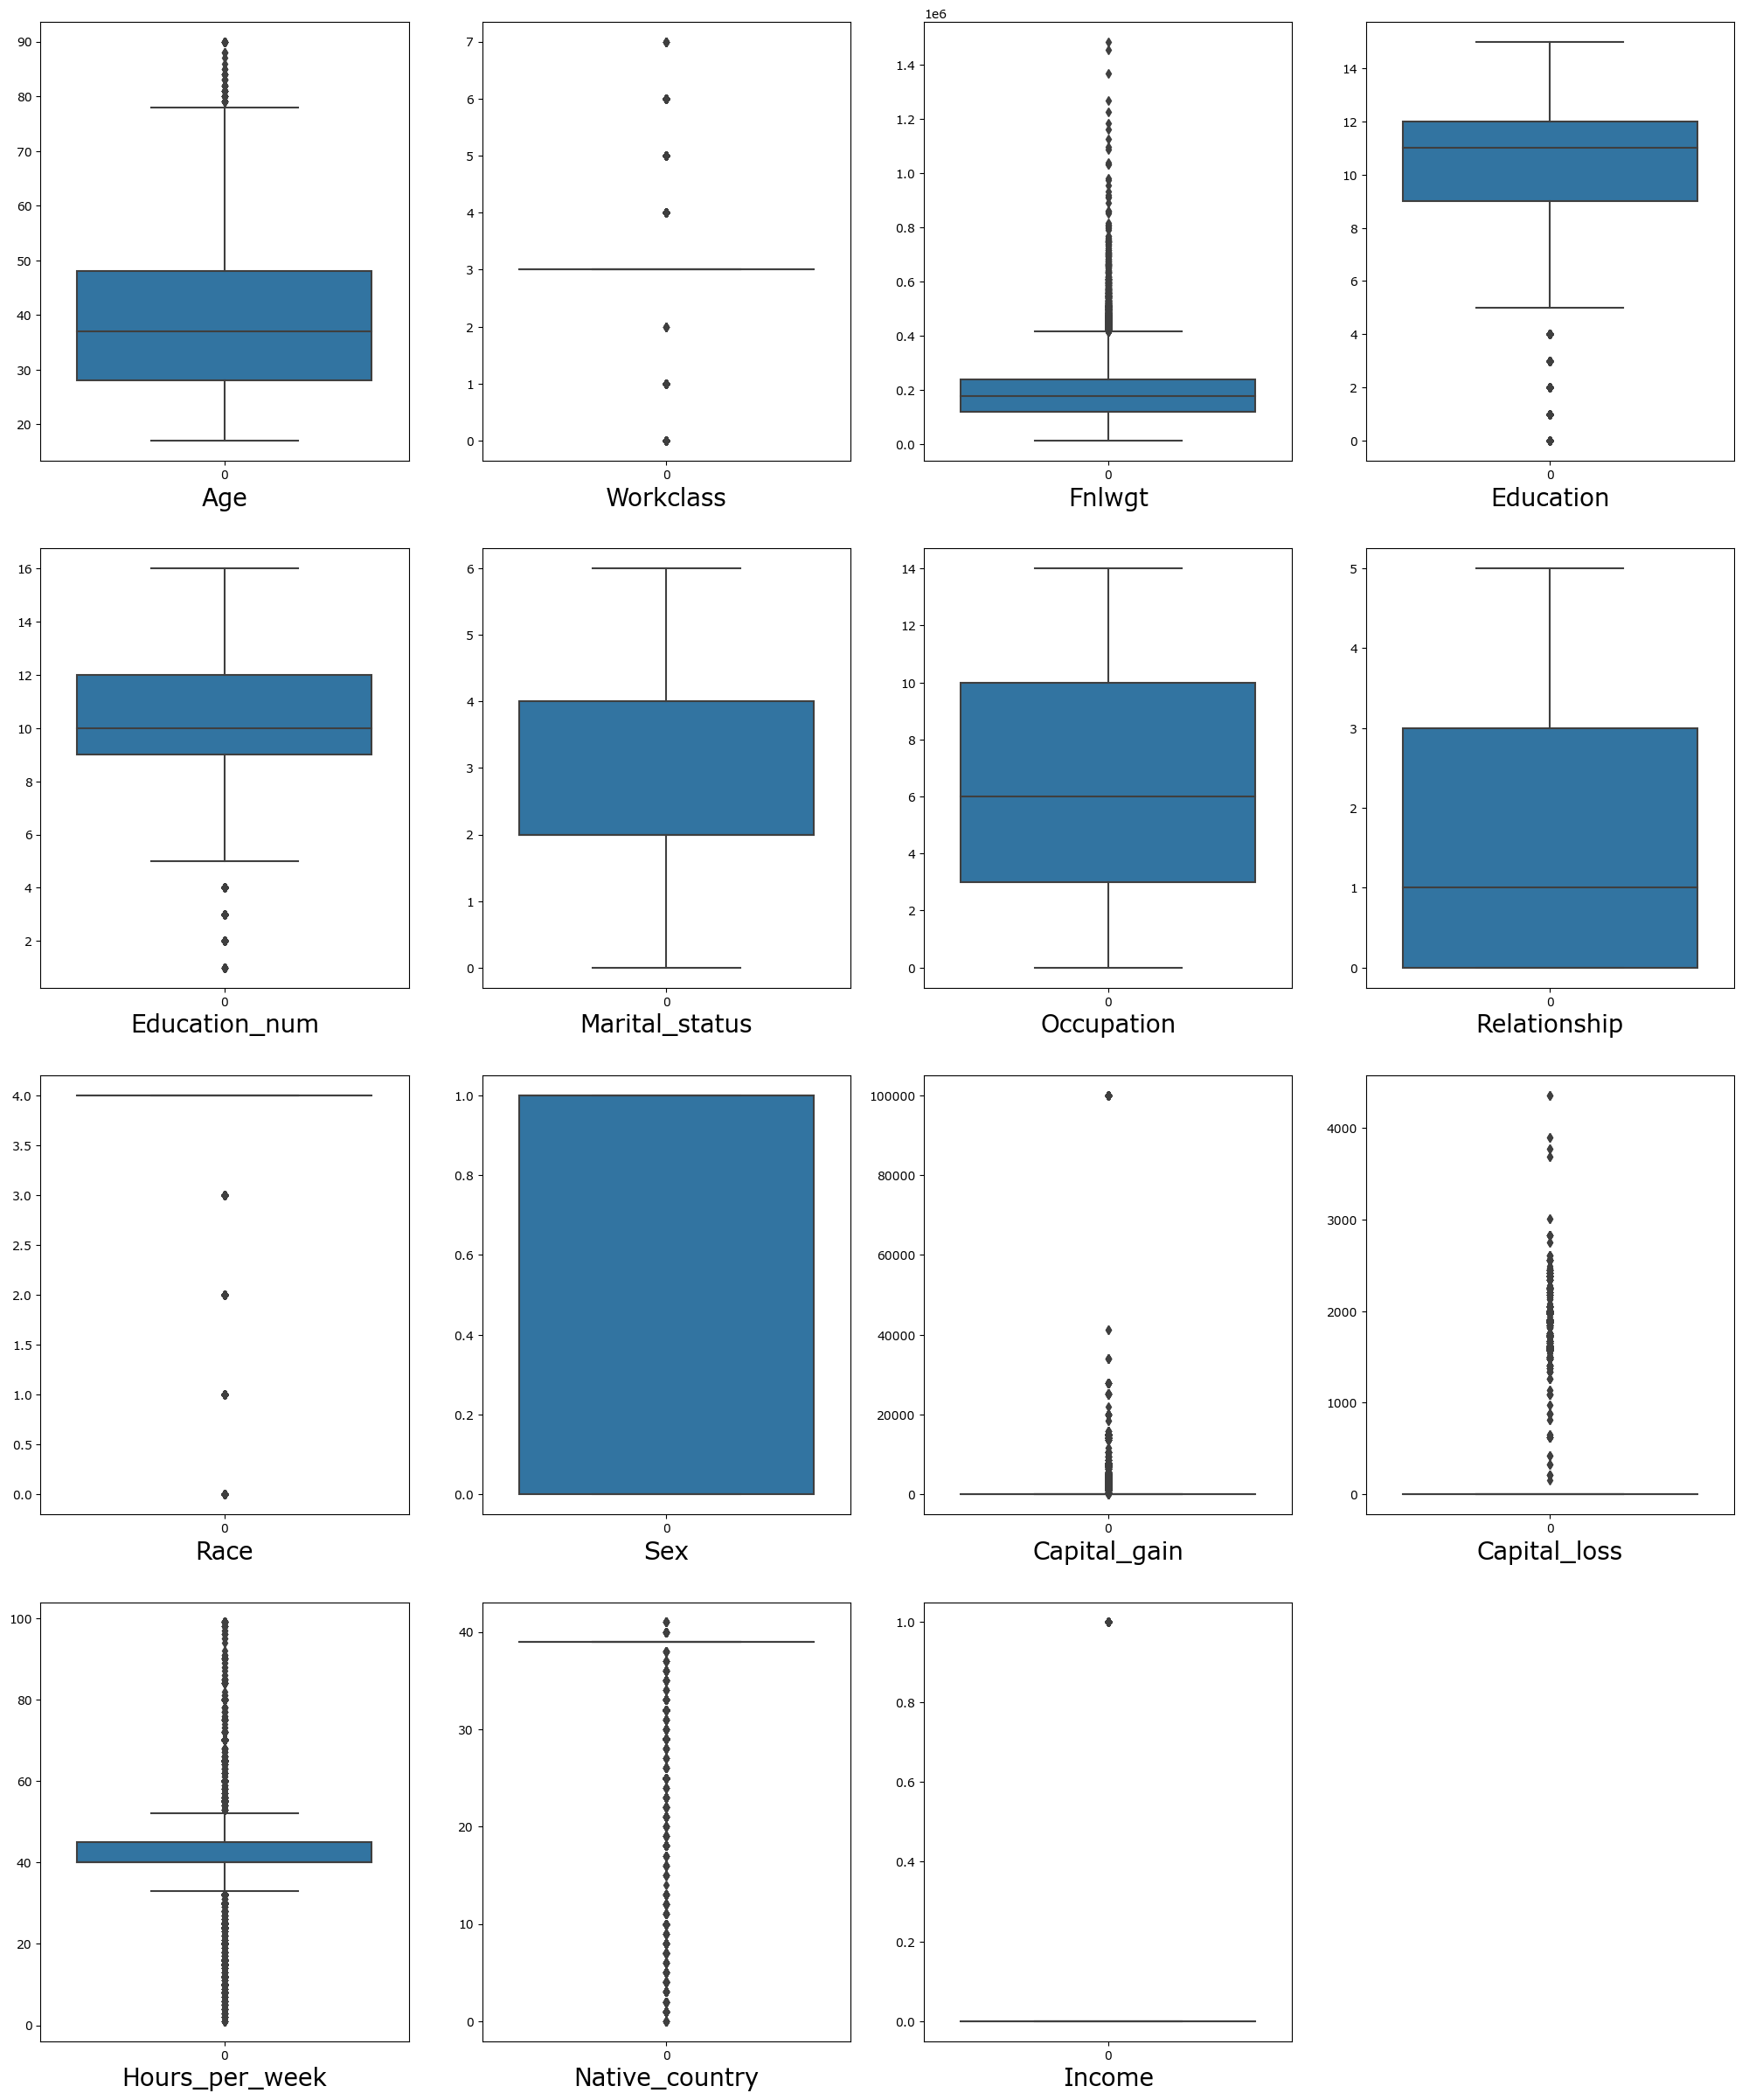

In [90]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=16:
        plt.subplot(4,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- Almost all continuous features are having outliers.
- We can see, all features are having outliers except, Sex ,Marital_status, Relation and Occupation.

### 9.1 Removing Outliers

In [91]:
from scipy.stats import zscore

z_score = zscore(data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [92]:
df.shape

(30028, 15)

In [93]:
data.shape

(32560, 15)

### 9.2 Percentage of data loss

In [94]:
data_loss = ((32560 - 30028)/32560*100)
print(data_loss,'%')

7.776412776412776 %


#### Data skewness before removing

In [95]:
data.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.090052
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.058159
Income             1.212383
dtype: float64

#### Data skewness after removing

In [96]:
df.skew()

Age                0.489206
Workclass          0.093656
Fnlwgt             0.633615
Education         -0.927349
Education_num     -0.324321
Marital_status    -0.047716
Occupation         0.097791
Relationship       0.745900
Race              -2.431921
Sex               -0.681754
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
Native_country    -4.037615
Income             1.339595
dtype: float64

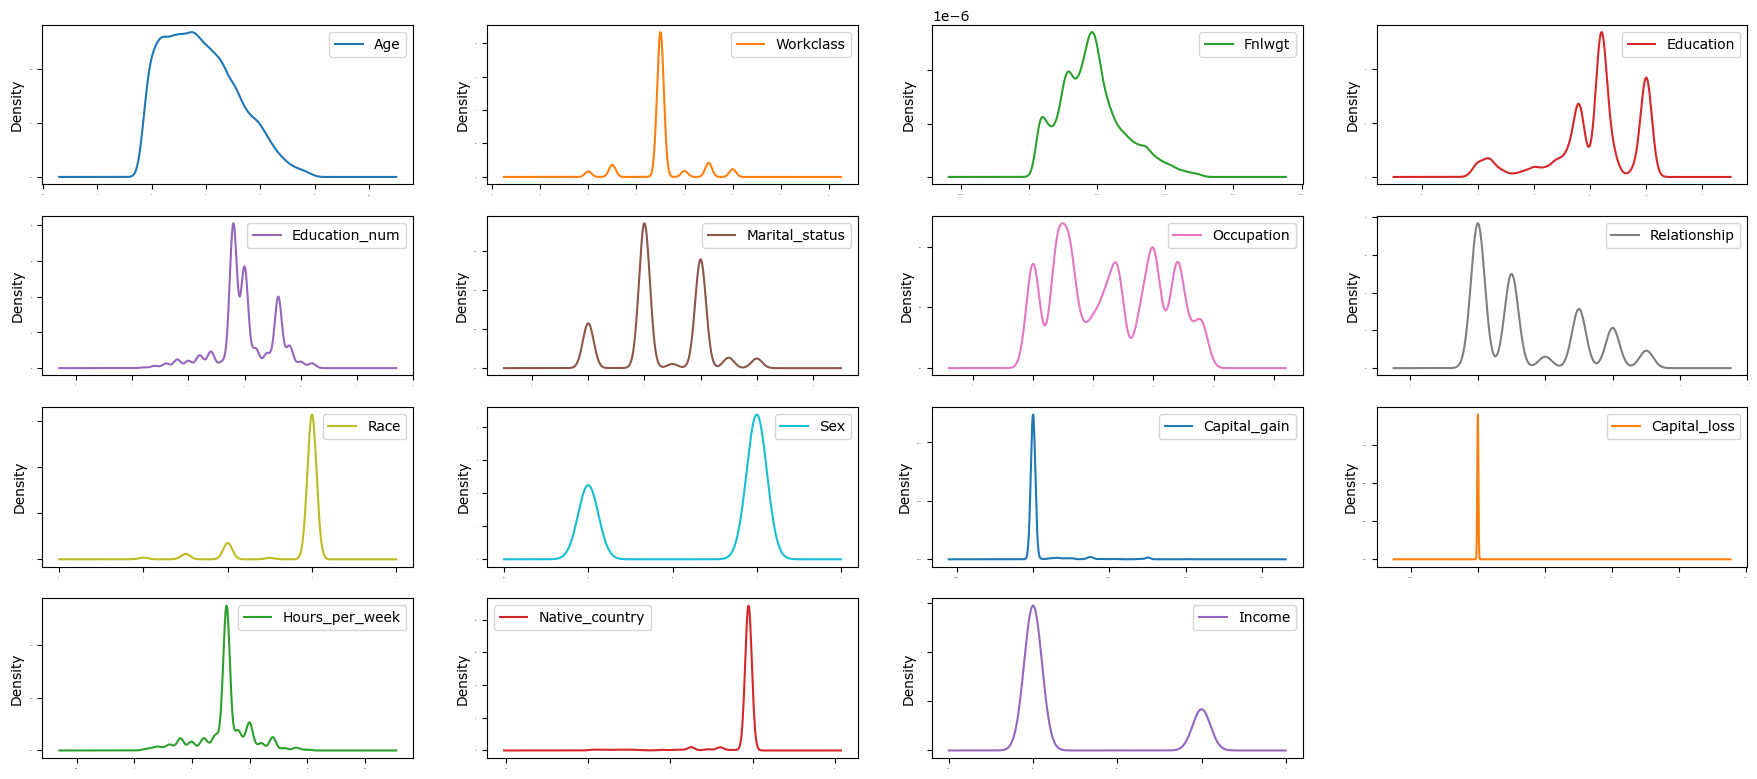

In [97]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

- can see, data is little nornally distributed after removing skewness.

## 10. Checking Multicollinearity

In [98]:
x = df.drop(columns=['Income'],axis=1)
y = df['Income']

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()

In [103]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Age,1.178057
1,Workclass,1.008011
2,Fnlwgt,1.013936
3,Education,1.161643
4,Education_num,1.226024
5,Marital_status,1.137268
6,Occupation,1.018715
7,Relationship,1.670065
8,Race,1.034496
9,Sex,1.549246


- If VIF > 5, It means multicollinearity is present.
- MultiCollinearity does not exists in dataset, Based on ANOVA F scores.


## 11. Building Model

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [105]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [106]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.92475174,  1.75839842, -1.11621886, ..., -0.04001334,
        -2.21603306,  0.32947444],
       [ 0.12695891, -0.08806457,  0.42217724, ..., -0.04001334,
        -0.03484024,  0.32947444],
       [ 1.099663  , -0.08806457,  0.60196761, ..., -0.04001334,
        -0.03484024,  0.32947444],
       ...,
       [ 1.37414843, -0.08806457, -0.23887039, ..., -0.04001334,
        -0.03484024,  0.32947444],
       [-1.33747974, -0.08806457,  0.28402217, ..., -0.04001334,
        -1.72000249,  0.32947444],
       [ 1.04226903,  0.82888578,  1.07104634, ..., -0.04001334,
        -0.03484024,  0.32947444]])

### 11.1 Balancing Datasaet

In [107]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
smt_y.value_counts()

## 11.2 LogisticRegression

### Finding Best Random state

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=515)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

### Cross - validation for logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

In [ ]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## 11.3 Random Forest Classifier

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=289)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


### Cross - Validation for Random Forest classifier

In [ ]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(rf,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## 11.4 Gradient Boosting Classifier

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=916)

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


### Cross - validation For GradientBoosting Classifier

In [ ]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(gbc,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## 11.5 XGBOOST

### Finding Best Random State

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=848)

In [ ]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


### Cross - Validation for XGBOOST

In [ ]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(xgb,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

# 11.6 SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)

### Cross - Validation for SVC

In [ ]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## 11.7 KNN
### Finding Random State

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=320)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)

### Cross - Validation for KNN

In [ ]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(knn,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## 12. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined GradientBoostingClassifier is the best model. It has least difference between accuracy score and cross validation. And It has high accuracy score and cross validation score then SVC.

## 13. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc =  GradientBoostingClassifier()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=916)

In [ ]:
parameters = {
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,3,4],
             'max_depth':[5,10,15],
             'learning_rate': [0.1,0.2,0.3],
              'n_estimators':[150,200,250],
             }

In [ ]:
grd = GridSearchCV(gbc,param_grid=parameters)

In [ ]:
grd.fit(x_train,y_train)

grd.best_params_

In [ ]:
gbc = GradientBoostingClassifier(max_depth=3,min_samples_split=2, min_samples_leaf=1, n_estimators=250, learning_rate=0.25)

gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train,y_test, train=True)  # This is for training score

metric_score(gbc,x_train,x_test,y_train,y_test, train=False) # This is for testing score


## 14. ROC_AUC Curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# AUC Curve For Training
disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plot_roc_curve(xgb, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [ ]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## 15. Documenting the finding

1. This dataset not balance , i.e. 76% of them are belong to income group (who earns more than 50k) and 23.93% fall under the income group  (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.62% of all observations.
   But for male, 20.31% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group >50K).

9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).


## 16.  Model Save

In [ ]:
import joblib
joblib.dump(gbc,"census_income_prediction.pkl")

### Loading The Model

In [ ]:
mod=joblib.load("census_income_prediction.pkl")

In [ ]:
print(mod.predict(x))

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)